# **Analyzing the Course Advising Dataset**
*Prinom Mojumder 2021-2-60-098*

*Suraiya Nusrat Tanha 2021-2-60-030*

*Tasnim Israk Synthia 2021-2-60-097*

# Dataset Analysis:

In [77]:
# Step 1: Define CSV file path
csv_file_path = '/content/Course_Advising_shuffled_file.csv'
import pandas as pd
data = pd.read_csv(csv_file_path)
print(data.head())

   StudentId  CreditsCompleted  takencredit  takennocourse      C1      C2  \
0          1              29.5         14.5              4  CSE110  ECO101   
1          2              41.0         14.0              4  CSE207  CSE209   
2          3              17.5         17.5              5  CSE110  ENG102   
3          4              44.5         13.5              4  CSE110  GEN203   
4          5              82.0          4.0              1  CSE303     NaN   

       C3      C4      C5   C6   C7  
0  MAT205  PHY109     NaN  NaN  NaN  
1  MAT205  PHY209     NaN  NaN  NaN  
2  MAT102  MAT104  PHY109  NaN  NaN  
3  MAT101  MAT205     NaN  NaN  NaN  
4     NaN     NaN     NaN  NaN  NaN  


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2960 entries, 0 to 2959
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   StudentId         2960 non-null   int64  
 1   CreditsCompleted  2960 non-null   float64
 2   takencredit       2960 non-null   float64
 3   takennocourse     2960 non-null   int64  
 4   C1                2960 non-null   object 
 5   C2                2938 non-null   object 
 6   C3                2877 non-null   object 
 7   C4                2604 non-null   object 
 8   C5                843 non-null    object 
 9   C6                124 non-null    object 
 10  C7                2 non-null      object 
dtypes: float64(2), int64(2), object(7)
memory usage: 254.5+ KB


In [79]:
null_values = df.isnull().sum()
print(null_values)

StudentId              0
CreditsCompleted       0
takencredit            0
takennocourse          0
C1                     0
C2                    22
C3                    83
C4                   356
C5                  2117
C6                  2836
C7                  2958
Year                 761
Courses                0
dtype: int64


In [80]:
data_types = df.dtypes
print(data_types)

StudentId             int64
CreditsCompleted    float64
takencredit         float64
takennocourse         int64
C1                   object
C2                   object
C3                   object
C4                   object
C5                   object
C6                   object
C7                   object
Year                 object
Courses              object
dtype: object


# 1. Frequency Analysis:

**Find the frequency of individual courses from C1 to C7.**



In [81]:
from pyspark.sql import SparkSession

In [82]:

# Step 1: Define CSV file path
csv_file_path = '/content/Course_Advising_shuffled_file.csv'

# Step 2: Initialize SparkSession
spark = SparkSession.builder.appName("WordCount").getOrCreate()

# Step 3: Load CSV file into RDD
rdd = spark.sparkContext.textFile(csv_file_path)

# Step 4: Process text data from columns C1 to C7
# Skip the header row and split each line into columns
header = rdd.first()
data_rdd = rdd.filter(lambda line: line != header)

# Extract relevant columns (C1 to C7), assuming a comma as the delimiter
columns_rdd = data_rdd.map(lambda line: line.split(",")[4:10])  # Adjust indices for C1 to C7

# Flatten the words, filter out empty values, and count them
words_rdd = columns_rdd.flatMap(lambda cols: [word.strip() for word in cols if word.strip()])
word_counts = words_rdd.map(lambda word: (word, 1)).reduceByKey(lambda x, y: x + y)

# Step 5: Collect and display the results
result = word_counts.collect()
print(result)


[('CSE110', 538), ('ECO101', 350), ('MAT205', 355), ('PHY109', 422), ('CSE207', 398), ('CSE209', 422), ('MAT104', 373), ('GEN203', 98), ('MAT101', 532), ('CSE303', 235), ('CHE109', 423), ('CSE103', 800), ('ENG101', 709), ('CSE347', 203), ('CSE405', 169), ('CSE200', 395), ('CSE246', 357), ('GEN210', 52), ('GEN214', 77), ('CSE345', 258), ('CSE487', 149), ('BUS231', 20), ('CSE360', 198), ('ENG099', 35), ('CSE430', 43), ('CSE479', 99), ('CSE400', 211), ('MKT101', 45), ('CSE412', 100), ('CSE438', 101), ('CSE495', 113), ('CSE350', 69), ('GEN209', 2), ('CE200-', 1), ('GEN202', 1), ('BUS101', 4), ('CSE453', 3), ('GEN205', 1), ('PHY209', 352), ('ENG102', 211), ('MAT102', 274), ('CSE106', 913), ('STA102', 436), ('CSE366', 199), ('GEN226', 255), ('CSE302', 279), ('CSE325', 254), ('FIN101', 133), ('CSE251', 226), ('CSE489', 57), ('CSE420', 35), ('ACT101', 31), ('CSE407', 104), ('CSE477', 52), ('MGT337', 8), ('CSE475', 94), ('CSE488', 33), ('CSE464', 36), ('ECO102', 2), ('MAT110', 1)]


In [83]:
import pandas as pd


# Convert to a Pandas DataFrame
df = pd.DataFrame(result, columns=['Word', 'Count'])

# Display the table
print(df)


      Word  Count
0   CSE110    538
1   ECO101    350
2   MAT205    355
3   PHY109    422
4   CSE207    398
5   CSE209    422
6   MAT104    373
7   GEN203     98
8   MAT101    532
9   CSE303    235
10  CHE109    423
11  CSE103    800
12  ENG101    709
13  CSE347    203
14  CSE405    169
15  CSE200    395
16  CSE246    357
17  GEN210     52
18  GEN214     77
19  CSE345    258
20  CSE487    149
21  BUS231     20
22  CSE360    198
23  ENG099     35
24  CSE430     43
25  CSE479     99
26  CSE400    211
27  MKT101     45
28  CSE412    100
29  CSE438    101
30  CSE495    113
31  CSE350     69
32  GEN209      2
33  CE200-      1
34  GEN202      1
35  BUS101      4
36  CSE453      3
37  GEN205      1
38  PHY209    352
39  ENG102    211
40  MAT102    274
41  CSE106    913
42  STA102    436
43  CSE366    199
44  GEN226    255
45  CSE302    279
46  CSE325    254
47  FIN101    133
48  CSE251    226
49  CSE489     57
50  CSE420     35
51  ACT101     31
52  CSE407    104
53  CSE477     52
54  MGT337

In [84]:
# Sort the results by count in descending order
sorted_result = sorted(result, key=lambda x: x[1], reverse=True)

# Convert to a Pandas DataFrame
df = pd.DataFrame(sorted_result, columns=['Word', 'Count'])

# Display the table
print(df.head(10))


     Word  Count
0  CSE106    913
1  CSE103    800
2  ENG101    709
3  CSE110    538
4  MAT101    532
5  STA102    436
6  CHE109    423
7  PHY109    422
8  CSE209    422
9  CSE207    398


**Identify the most and least popular courses.**

In [85]:
# Sort the results by count in descending order
sorted_result = sorted(result, key=lambda x: x[1], reverse=True)

# Identify the most and least popular courses
most_popular_course = sorted_result[0]  # First item in sorted list (highest count)
least_popular_courses = [item for item in sorted_result if item[1] == sorted_result[-1][1]]  # Check for lowest count

# Display results
print(f"Most Popular Course: {most_popular_course[0]} with {most_popular_course[1]} occurrences")
print("Least Popular Course(s):")
for course in least_popular_courses:
    print(f"{course[0]} with {course[1]} occurrences")


Most Popular Course: CSE106 with 913 occurrences
Least Popular Course(s):
CE200- with 1 occurrences
GEN202 with 1 occurrences
GEN205 with 1 occurrences
MAT110 with 1 occurrences


Identify the most and least popular courses.(**Using Spark-RDD**)

In [86]:
# Step 1: Sort the word counts RDD by count in descending order
sorted_rdd = word_counts.sortBy(lambda x: x[1], ascending=False)

# Step 2: Get the most popular course (first element in sorted RDD)
most_popular_course = sorted_rdd.first()

# Step 3: Get the least popular courses (filter by the minimum count)
# First, find the minimum count
min_count = sorted_rdd.sortBy(lambda x: x[1]).first()[1]  # get 1st column using: .first()[1]

# Filter courses with the minimum count
least_popular_courses = sorted_rdd.filter(lambda x: x[1] == min_count).collect()

# Display results
print(f"Most Popular Course: {most_popular_course[0]} with {most_popular_course[1]} occurrences")
print("Least Popular Courses:")
for course in least_popular_courses:
    print(f"{course[0]} with {course[1]} occurrences")


Most Popular Course: CSE106 with 913 occurrences
Least Popular Courses:
CE200- with 1 occurrences
GEN202 with 1 occurrences
GEN205 with 1 occurrences
MAT110 with 1 occurrences


# 2. Pattern Analysis:

**Identify the most frequent combinations of courses taken together (pair)**

In [87]:
# Step 1: Extract relevant columns (C1 to C7) from the dataset
columns_rdd = data_rdd.map(lambda line: line.split(",")[4:10])  # Adjust indices for C1 to C7

# Step 2: Generate all possible pairs of courses from each row
from itertools import combinations

pairs_rdd = columns_rdd.flatMap(lambda cols: [(a, b) for a, b in combinations(cols, 2) if a.strip() and b.strip()])
# combinations(cols, 2) generates all pairs of courses (2-combinations)
#

# Step 3: Count the occurrences of each pair
pair_counts = pairs_rdd.map(lambda pair: (tuple(sorted(pair)), 1)).reduceByKey(lambda x, y: x + y)

# Step 4: Sort pairs by their count in descending order
sorted_pairs_rdd = pair_counts.sortBy(lambda x: x[1], ascending=False)

# Step 5: Collect and display the most frequent pairs
most_frequent_pairs = sorted_pairs_rdd.collect()

# Display results
print("Most Frequent Course Pairs:")
for pair, count in most_frequent_pairs[:10]:  # Display top 10 pairs
    print(f"{pair} with {count} occurrences")


Most Frequent Course Pairs:
('CSE103', 'CSE106') with 756 occurrences
('CSE103', 'ENG101') with 696 occurrences
('CSE106', 'ENG101') with 693 occurrences
('CSE106', 'MAT101') with 509 occurrences
('CSE103', 'MAT101') with 508 occurrences
('ENG101', 'MAT101') with 460 occurrences
('CHE109', 'CSE106') with 307 occurrences
('CHE109', 'CSE103') with 283 occurrences
('CSE110', 'STA102') with 243 occurrences
('CHE109', 'ENG101') with 238 occurrences


In [88]:
# Step 1: Extract relevant columns (C1 to C7) from the dataset
columns_rdd = data_rdd.map(lambda line: line.split(",")[4:10])  # Adjust indices for C1 to C7

# Step 2: Generate all possible triples of courses from each row
from itertools import combinations

triples_rdd = columns_rdd.flatMap(lambda cols: [(a, b, c) for a, b, c in combinations(cols, 3) if a.strip() and b.strip() and c.strip()])

# Step 3: Count the occurrences of each triple
triple_counts = triples_rdd.map(lambda triple: (tuple(sorted(triple)), 1)).reduceByKey(lambda x, y: x + y)

# Step 4: Sort triples by their count in descending order
sorted_triples_rdd = triple_counts.sortBy(lambda x: x[1], ascending=False)

# Step 5: Collect and display the most frequent triples
most_frequent_triples = sorted_triples_rdd.collect()

# Display results
print("Most Frequent Course Triples:")
for triple, count in most_frequent_triples[:]:  # Display top 10 triples
    print(f"{triple} with {count} occurrences")


Most Frequent Course Triples:
('CSE103', 'CSE106', 'ENG101') with 691 occurrences
('CSE103', 'CSE106', 'MAT101') with 501 occurrences
('CSE103', 'ENG101', 'MAT101') with 459 occurrences
('CSE106', 'ENG101', 'MAT101') with 457 occurrences
('CHE109', 'CSE103', 'CSE106') with 269 occurrences
('CHE109', 'CSE103', 'ENG101') with 234 occurrences
('CHE109', 'CSE106', 'ENG101') with 230 occurrences
('CSE110', 'PHY109', 'STA102') with 93 occurrences
('CSE207', 'CSE209', 'MAT205') with 88 occurrences
('CSE110', 'MAT104', 'STA102') with 86 occurrences
('CSE110', 'MAT102', 'PHY109') with 82 occurrences
('CSE110', 'MAT104', 'PHY109') with 81 occurrences
('CSE110', 'CSE200', 'STA102') with 67 occurrences
('CSE110', 'MAT102', 'STA102') with 67 occurrences
('CSE110', 'ECO101', 'STA102') with 66 occurrences
('CSE207', 'CSE209', 'ECO101') with 66 occurrences
('CSE209', 'ECO101', 'MAT205') with 63 occurrences
('CSE110', 'CSE209', 'STA102') with 60 occurrences
('CSE200', 'CSE207', 'CSE209') with 60 occurr

In [89]:
# Step 1: Extract relevant columns (C1 to C7) from the dataset
columns_rdd = data_rdd.map(lambda line: line.split(",")[4:10])  # Adjust indices for C1 to C7

# Step 2: Generate all possible quadruples of courses from each row
from itertools import combinations

quadruples_rdd = columns_rdd.flatMap(lambda cols: [(a, b, c, d) for a, b, c, d in combinations(cols, 4) if a.strip() and b.strip() and c.strip() and d.strip()])

# Step 3: Count the occurrences of each quadruple
quadruple_counts = quadruples_rdd.map(lambda quadruple: (tuple(sorted(quadruple)), 1)).reduceByKey(lambda x, y: x + y)

# Step 4: Sort quadruples by their count in descending order
sorted_quadruples_rdd = quadruple_counts.sortBy(lambda x: x[1], ascending=False)

# Step 5: Collect and display the most frequent quadruples
most_frequent_quadruples = sorted_quadruples_rdd.collect()

# Display results
print("Most Frequent Course Quadruples:")
for quadruple, count in most_frequent_quadruples[:10]:  # Display top 10 quadruples
    print(f"{quadruple} with {count} occurrences")


Most Frequent Course Quadruples:
('CSE103', 'CSE106', 'ENG101', 'MAT101') with 457 occurrences
('CHE109', 'CSE103', 'CSE106', 'ENG101') with 230 occurrences
('CSE207', 'CSE209', 'ECO101', 'MAT205') with 36 occurrences
('CHE109', 'CSE103', 'CSE106', 'MAT101') with 35 occurrences
('CSE110', 'MAT102', 'PHY109', 'STA102') with 34 occurrences
('CSE103', 'CSE106', 'ENG099', 'MAT101') with 31 occurrences
('CSE110', 'ENG102', 'MAT102', 'PHY109') with 27 occurrences
('CSE110', 'ECO101', 'MAT104', 'STA102') with 25 occurrences
('CSE110', 'MAT104', 'PHY109', 'STA102') with 25 occurrences
('CSE207', 'CSE209', 'GEN226', 'MAT205') with 24 occurrences


**Find the average number of courses taken by a student.**

In [90]:
# Step 1: Extract relevant columns (C1 to C7) from the dataset
columns_list = data_rdd.map(lambda line: line.split(",")[4:10]).collect()  # Collect RDD as a list

# Step 2: Count the number of non-empty courses for each student
course_counts = []  # List to store the number of courses for each student
for row in columns_list:
    count = 0  # Initialize count for the current student
    for course in row:  # Loop through each course in the row
        if course.strip():  # Check if the course is non-empty
            count += 1
    course_counts.append(count)  # Append the count to the list

# Step 3: Calculate the total number of courses and the number of students
total_courses = sum(course_counts)  # Total courses across all students
num_students = len(course_counts)  # Total number of students

# Step 4: Calculate the average number of courses
average_courses = total_courses / num_students if num_students > 0 else 0

# Step 5: Display the result
print(f"Average number of courses taken by a student: {int(average_courses)}")


Average number of courses taken by a student: 4


**Find the maximum and minimum number of courses taken by a student.**

In [91]:
# Step 1: Extract relevant columns (C1 to C7) from the dataset
columns_list = data_rdd.map(lambda line: line.split(",")[4:10]).collect()  # Collect RDD as a list

# Step 2: Count the number of non-empty courses for each student
course_counts = []  # List to store the number of courses for each student
for row in columns_list:
    count = 0  # Initialize count for the current student
    for course in row:  # Loop through each course in the row
        if course.strip():  # Check if the course is non-empty
            count += 1
    course_counts.append(count)  # Append the count to the list

# Step 3: Calculate the maximum and minimum number of courses taken
max_courses = max(course_counts) if course_counts else 0  # Maximum courses taken by a student
min_courses = min(course_counts) if course_counts else 0  # Minimum courses taken by a student

# Step 4: Display the results
print(f"Maximum number of courses taken by a student: {max_courses}")
print(f"Minimum number of courses taken by a student: {min_courses}")


Maximum number of courses taken by a student: 6
Minimum number of courses taken by a student: 1


# 3. Statistical Measures:

Calculate mean, median, and mode for numerical columns like
CreditsCompleted, takencredit, and takennocourse.

In [94]:
from pyspark.sql import functions as F

# Step 1: Load the dataset into a DataFrame
df = spark.read.csv(csv_file_path, header=True, inferSchema=True)

# Step 2: Calculate mean, median, and mode for numerical columns
numerical_columns = ['CreditsCompleted', 'takencredit', 'takennocourse']

# Mean
mean_values = df.select([F.mean(col).alias(f'{col}_mean') for col in numerical_columns])

# Median
def median_udf(col):
    return F.expr(f'percentile_approx({col}, 0.5)')

median_values = df.select([median_udf(col).alias(f'{col}_median') for col in numerical_columns])

# Mode
mode_values = {}
for col in numerical_columns:
    mode_values[col] = df.groupBy(col).count().orderBy(F.desc('count')).first()[0]

# Collect results
mean_values.show()
median_values.show()
print("Mode values:", mode_values)


+---------------------+----------------+------------------+
|CreditsCompleted_mean|takencredit_mean|takennocourse_mean|
+---------------------+----------------+------------------+
|   42.559797297297294|        14.46875| 4.171621621621622|
+---------------------+----------------+------------------+

+-----------------------+------------------+--------------------+
|CreditsCompleted_median|takencredit_median|takennocourse_median|
+-----------------------+------------------+--------------------+
|                   33.5|              14.5|                   4|
+-----------------------+------------------+--------------------+

Mode values: {'CreditsCompleted': 0.0, 'takencredit': 14.5, 'takennocourse': 4}


**Relation between CreditsCompleted and takencredit**

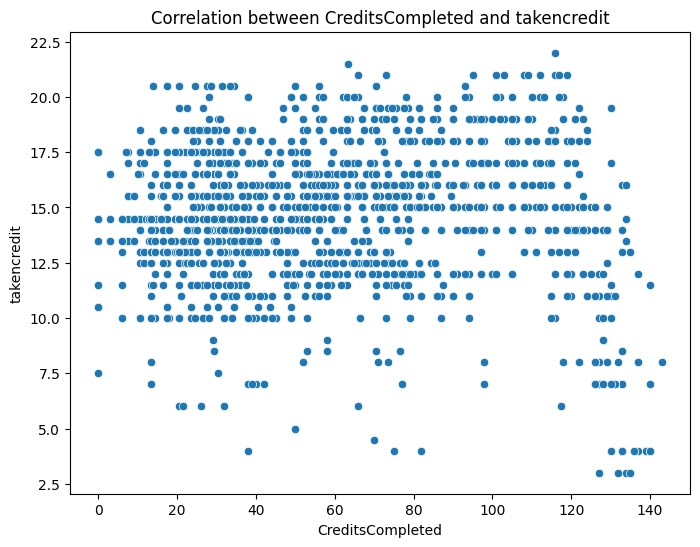

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_correlation(df):
    # Convert to Pandas for visualization
    pandas_df = df.select('CreditsCompleted', 'takencredit').toPandas()

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='CreditsCompleted', y='takencredit', data=pandas_df)

    # Add title and labels
    plt.title('Correlation between CreditsCompleted and takencredit')
    plt.xlabel('CreditsCompleted')
    plt.ylabel('takencredit')

    # Show plot
    plt.show()

# Call the function
visualize_correlation(df)


# Visualization Tasks:

# 4.**Course Popularity:**



*    Create a bar chart to show the frequency of each course, pairs, triples based on the  frequency analysis.




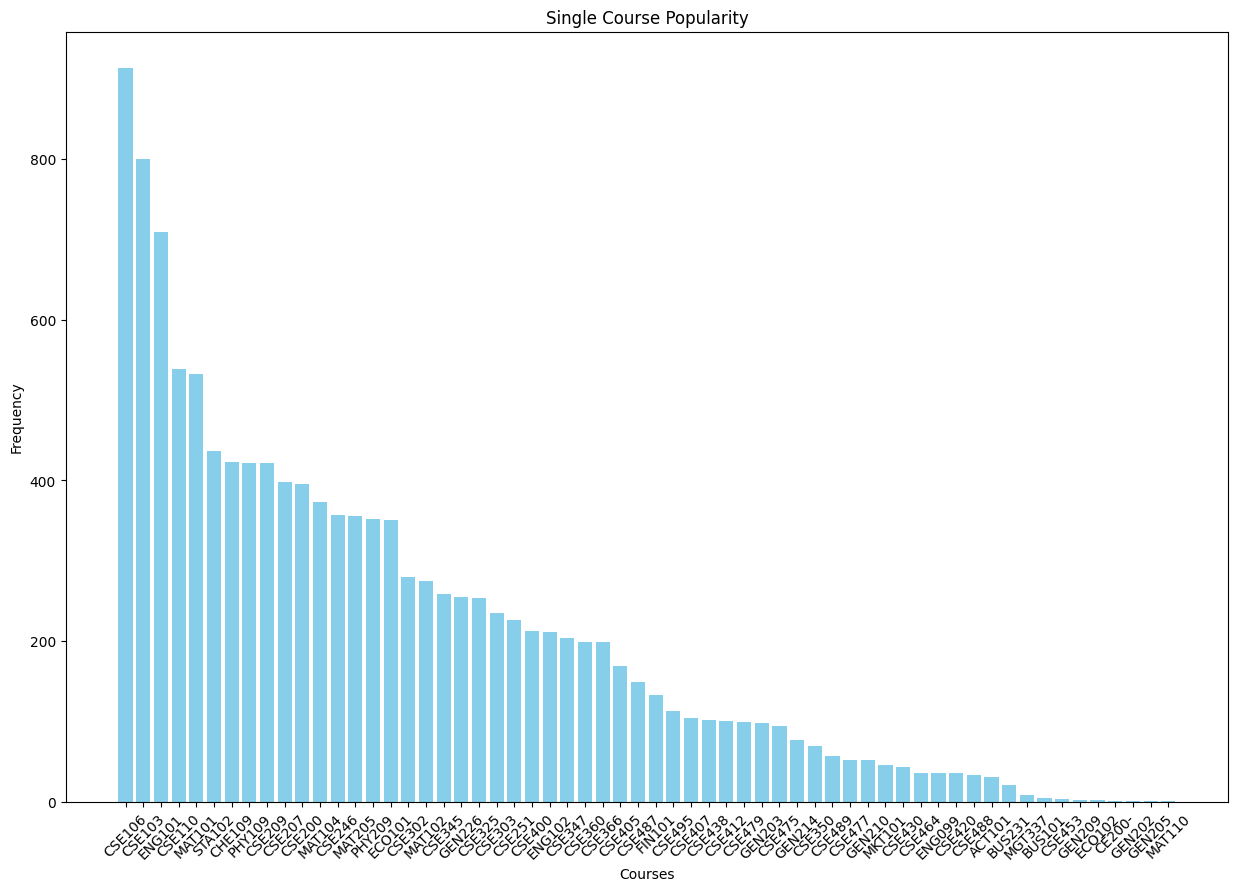

In [97]:
def visualize_course_popularity(df):
    from pyspark.sql.functions import col, array, explode
    import matplotlib.pyplot as plt

    # Combine course columns into a single array column
    df = df.withColumn('Courses', array('C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'))

    # Explode the Courses column to get individual courses
    single_courses = (df.select(explode(col('Courses')).alias('Course'))
                        .filter(col('Course').isNotNull())
                        .groupBy('Course')
                        .count()
                        .orderBy('count', ascending=False))

    # Convert to Pandas for visualization
    single_courses_pd = single_courses.toPandas()

    # Plot the single course popularity
    plt.figure(figsize=(15, 10))
    plt.bar(single_courses_pd['Course'], single_courses_pd['count'], color='skyblue')
    plt.title('Single Course Popularity')
    plt.xlabel('Courses')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Call the function
visualize_course_popularity(df)


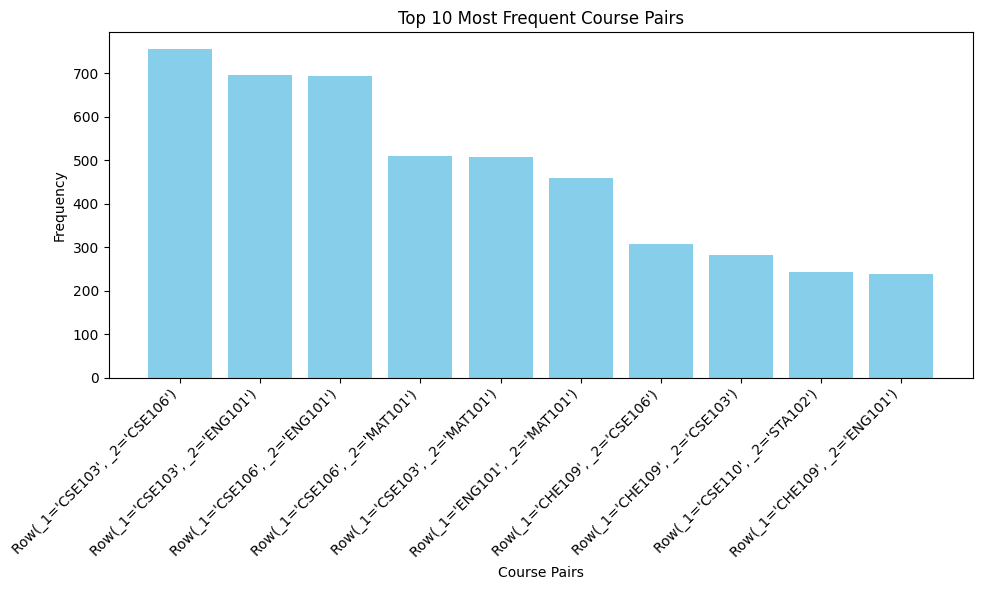

In [98]:
def visualize_top_pairs(pair_counts_rdd):
    import matplotlib.pyplot as plt

    # Convert the RDD to a DataFrame
    pair_counts_df = pair_counts_rdd.toDF(['Pair', 'count'])

    # Convert the DataFrame to Pandas
    pair_counts_pd = pair_counts_df.toPandas()

    # Select the top 10 pairs based on frequency
    top_pairs = pair_counts_pd.nlargest(10, 'count')

    # Extract values for plotting (ensure pairs are in string format)
    pairs = top_pairs['Pair'].astype(str).tolist()
    counts = top_pairs['count'].tolist()

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.bar(pairs, counts, color='skyblue')
    plt.title('Top 10 Most Frequent Course Pairs')
    plt.xlabel('Course Pairs')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Assuming 'pair_counts' is an RDD with Pair and count
visualize_top_pairs(pair_counts)


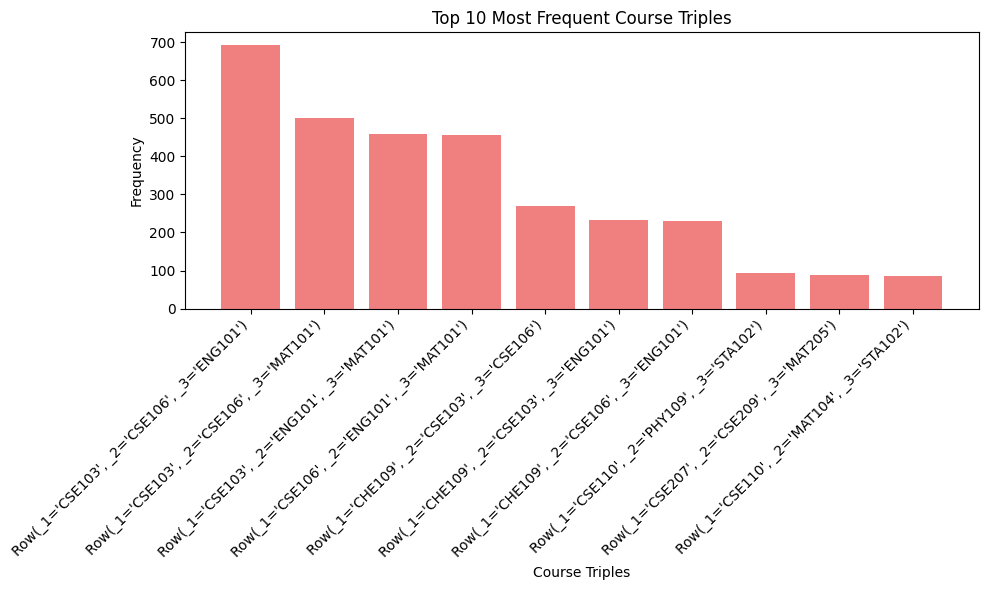

In [99]:
def visualize_top_triples(triple_counts_rdd):
    import matplotlib.pyplot as plt

    # Convert the RDD to a DataFrame
    triple_counts_df = triple_counts_rdd.toDF(['Triple', 'count'])

    # Convert the DataFrame to Pandas
    triple_counts_pd = triple_counts_df.toPandas()

    # Select the top 10 triples based on frequency
    top_triples = triple_counts_pd.nlargest(10, 'count')

    # Extract values for plotting (ensure triples are in string format)
    triples = top_triples['Triple'].astype(str).tolist()
    counts = top_triples['count'].tolist()

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.bar(triples, counts, color='lightcoral')
    plt.title('Top 10 Most Frequent Course Triples')
    plt.xlabel('Course Triples')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Assuming 'triple_counts' is an RDD with Triple and count
visualize_top_triples(triple_counts)


# 5. Combination Patterns:

Use a heatmap or chord daiagramto visualize the relationships between courses  frequently taken together.

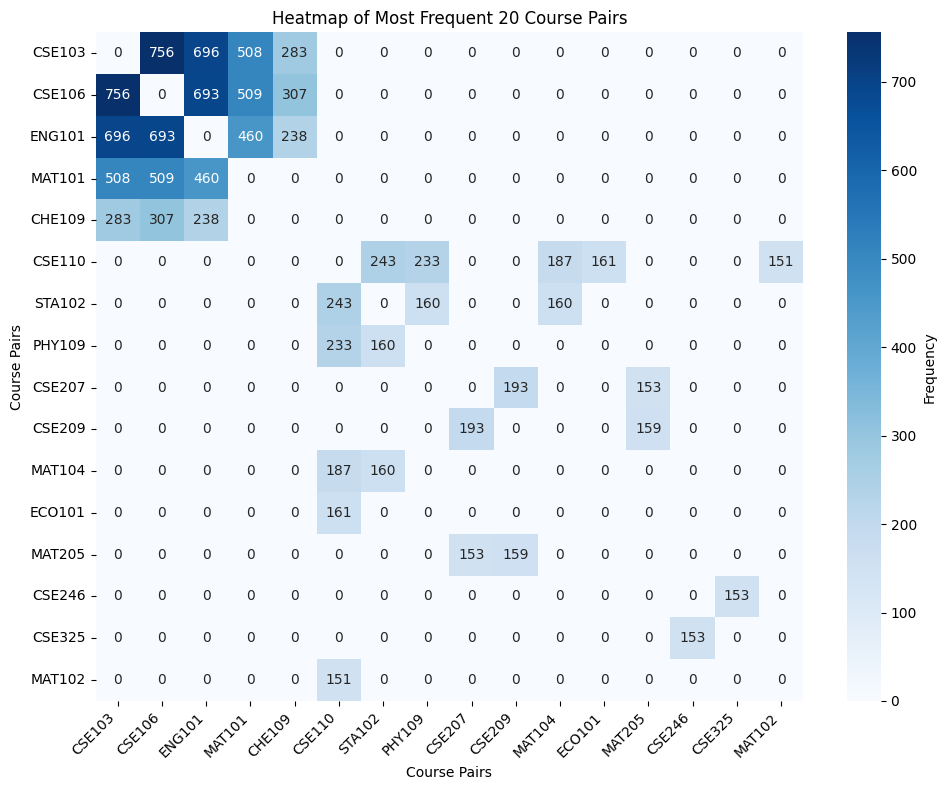

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations

# Assuming 'data_rdd' is already defined and the previous steps for counting pairs are done

# Step 1: Extract relevant columns (C1 to C7) from the dataset
columns_rdd = data_rdd.map(lambda line: line.split(",")[4:10])  # Adjust indices for C1 to C7

# Step 2: Generate all possible pairs of courses from each row
pairs_rdd = columns_rdd.flatMap(lambda cols: [(a, b) for a, b in combinations(cols, 2) if a.strip() and b.strip()])

# Step 3: Count the occurrences of each pair
pair_counts = pairs_rdd.map(lambda pair: (tuple(sorted(pair)), 1)).reduceByKey(lambda x, y: x + y)

# Step 4: Sort pairs by their count in descending order
sorted_pairs_rdd = pair_counts.sortBy(lambda x: x[1], ascending=False)

# Step 5: Collect the most frequent pairs and extract the top 20 pairs
most_frequent_pairs = sorted_pairs_rdd.collect()
top_20_pairs = most_frequent_pairs[:20]

# Step 6: Create a dictionary to map pair counts
pair_dict = {}
for (course1, course2), count in top_20_pairs:
    if course1 not in pair_dict:
        pair_dict[course1] = {}
    pair_dict[course1][course2] = count
    if course2 not in pair_dict:
        pair_dict[course2] = {}
    pair_dict[course2][course1] = count

# Step 7: Create a list of all courses involved in the top 20 pairs
courses = list(pair_dict.keys())

# Step 8: Initialize an empty matrix to store pair frequencies
matrix = np.zeros((len(courses), len(courses)))

# Step 9: Fill the matrix with pair frequencies
for i, course1 in enumerate(courses):
    for j, course2 in enumerate(courses):
        if course2 in pair_dict.get(course1, {}):
            matrix[i, j] = pair_dict[course1][course2]

# Step 10: Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, xticklabels=courses, yticklabels=courses, cmap='Blues', fmt=".0f", cbar_kws={'label': 'Frequency'})
plt.title('Heatmap of Most Frequent 20 Course Pairs')
plt.xlabel('Course Pairs')
plt.ylabel('Course Pairs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**For all course:**

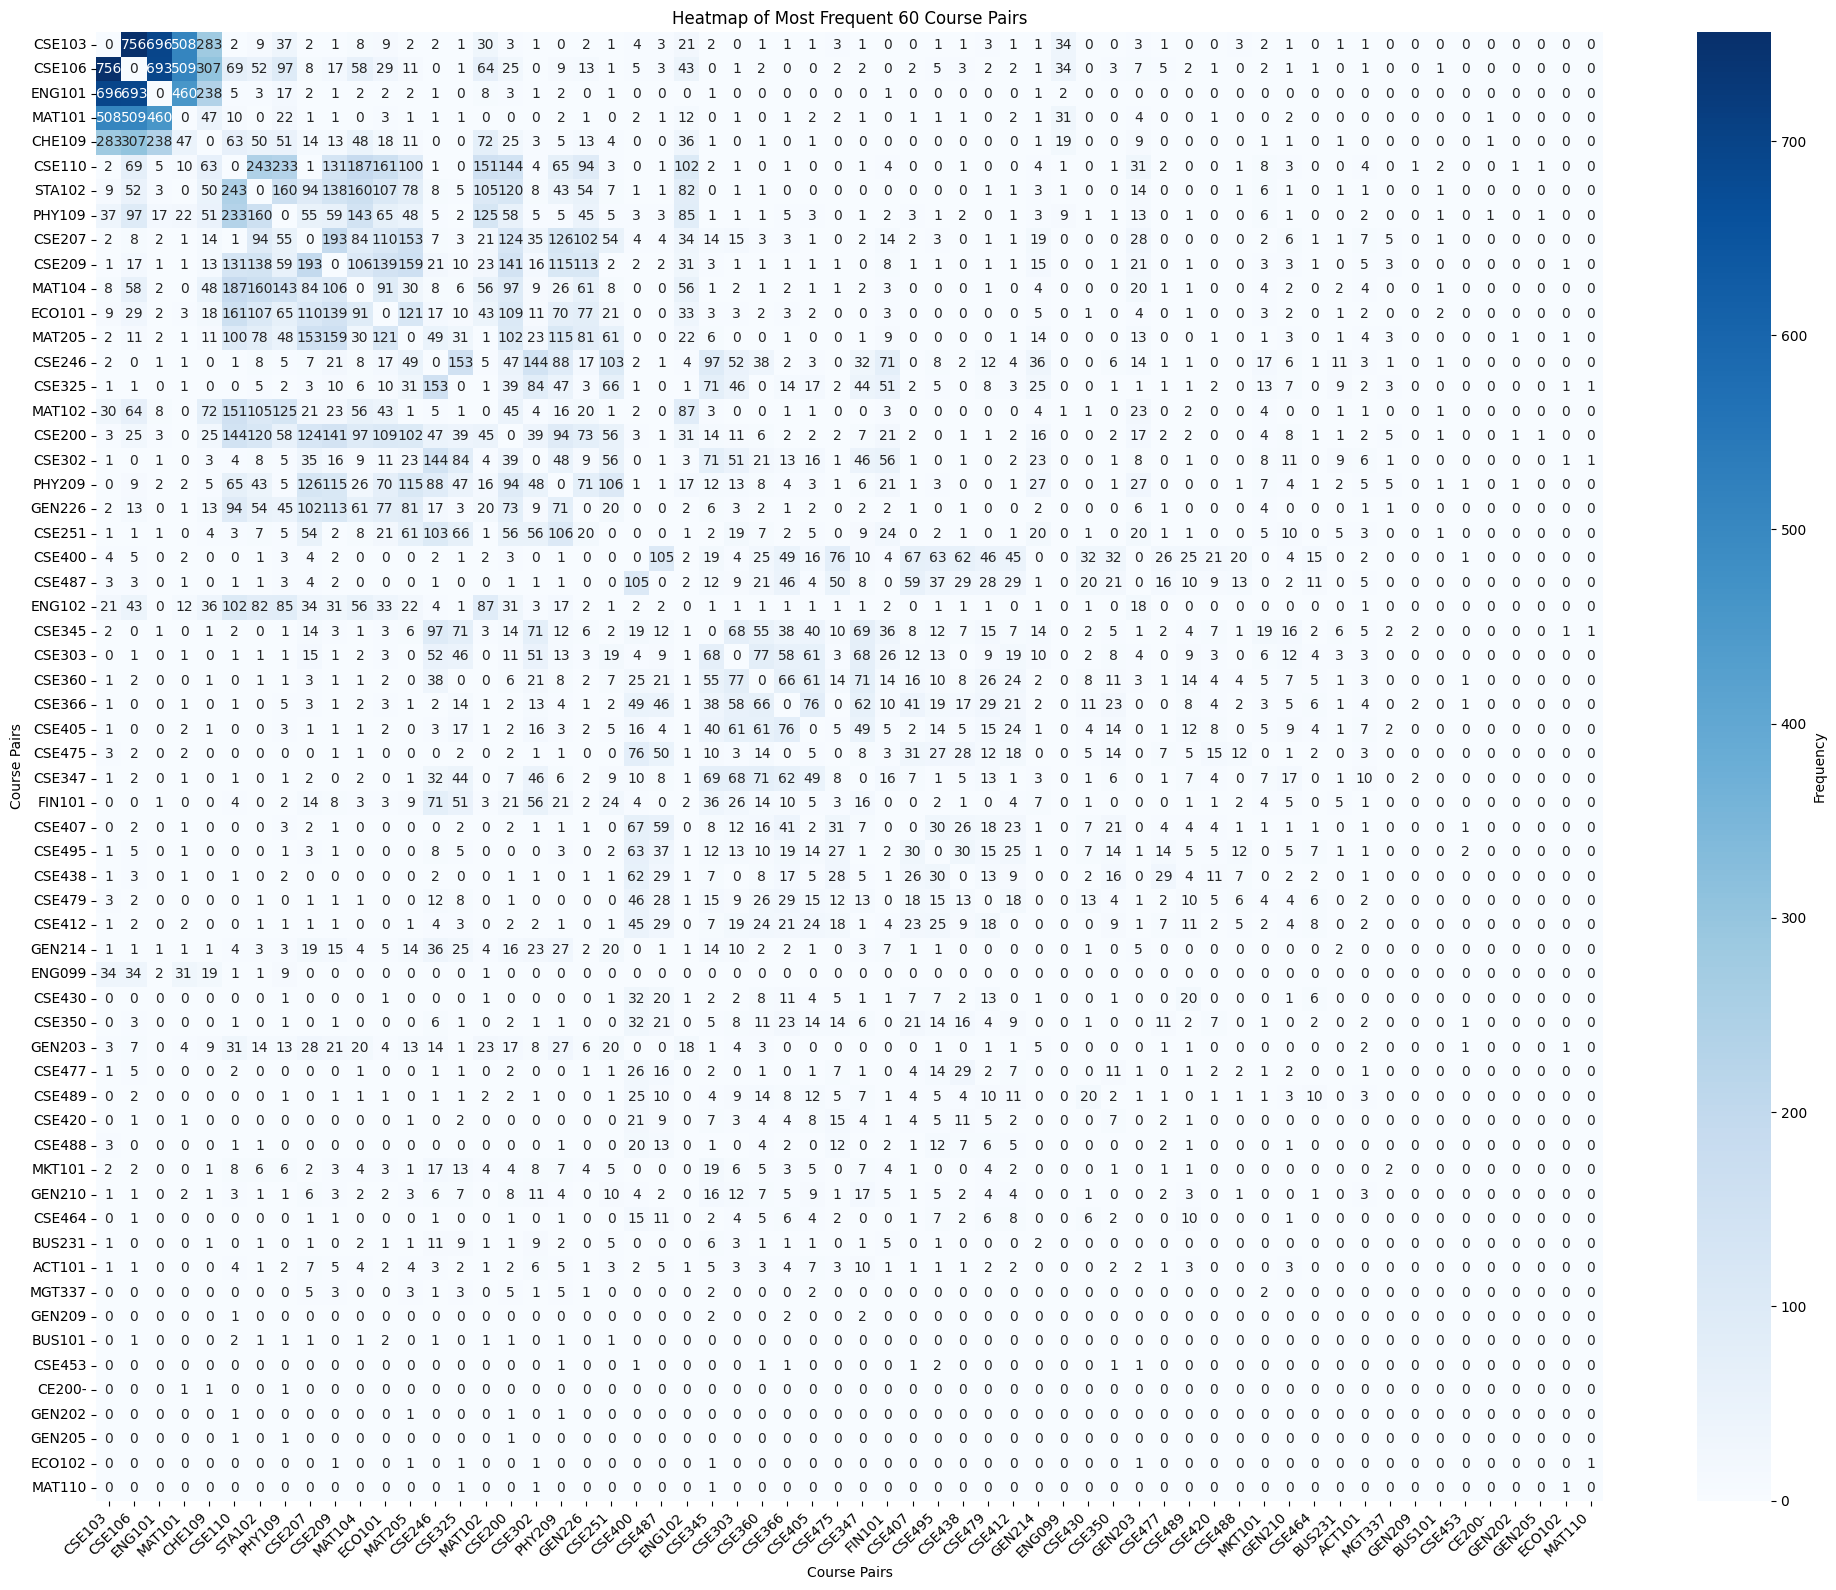

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations

# Assuming 'data_rdd' is already defined and the previous steps for counting pairs are done

# Step 1: Extract relevant columns (C1 to C7) from the dataset
columns_rdd = data_rdd.map(lambda line: line.split(",")[4:10])  # Adjust indices for C1 to C7

# Step 2: Generate all possible pairs of courses from each row
pairs_rdd = columns_rdd.flatMap(lambda cols: [(a, b) for a, b in combinations(cols, 2) if a.strip() and b.strip()])

# Step 3: Count the occurrences of each pair
pair_counts = pairs_rdd.map(lambda pair: (tuple(sorted(pair)), 1)).reduceByKey(lambda x, y: x + y)

# Step 4: Sort pairs by their count in descending order
sorted_pairs_rdd = pair_counts.sortBy(lambda x: x[1], ascending=False)

# Step 5: Collect the most frequent pairs and extract the top 60 pairs
most_frequent_pairs = sorted_pairs_rdd.collect()
top_60_pairs = most_frequent_pairs[:]

# Step 6: Create a dictionary to map pair counts
pair_dict = {}
for (course1, course2), count in top_60_pairs:
    if course1 not in pair_dict:
        pair_dict[course1] = {}
    pair_dict[course1][course2] = count
    if course2 not in pair_dict:
        pair_dict[course2] = {}
    pair_dict[course2][course1] = count

# Step 7: Create a list of all courses involved in the top 60 pairs
courses = list(pair_dict.keys())

# Step 8: Initialize an empty matrix to store pair frequencies
matrix = np.zeros((len(courses), len(courses)))

# Step 9: Fill the matrix with pair frequencies
for i, course1 in enumerate(courses):
    for j, course2 in enumerate(courses):
        if course2 in pair_dict.get(course1, {}):
            matrix[i, j] = pair_dict[course1][course2]

# Step 10: Create the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(matrix, annot=True, xticklabels=courses, yticklabels=courses, cmap='Blues', fmt=".0f", cbar_kws={'label': 'Frequency'})
plt.title('Heatmap of Most Frequent 60 Course Pairs')
plt.xlabel('Course Pairs')
plt.ylabel('Course Pairs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 6.Credits Distribution:
Plot a histogram for the distribution of CreditsCompleted and takencredit.

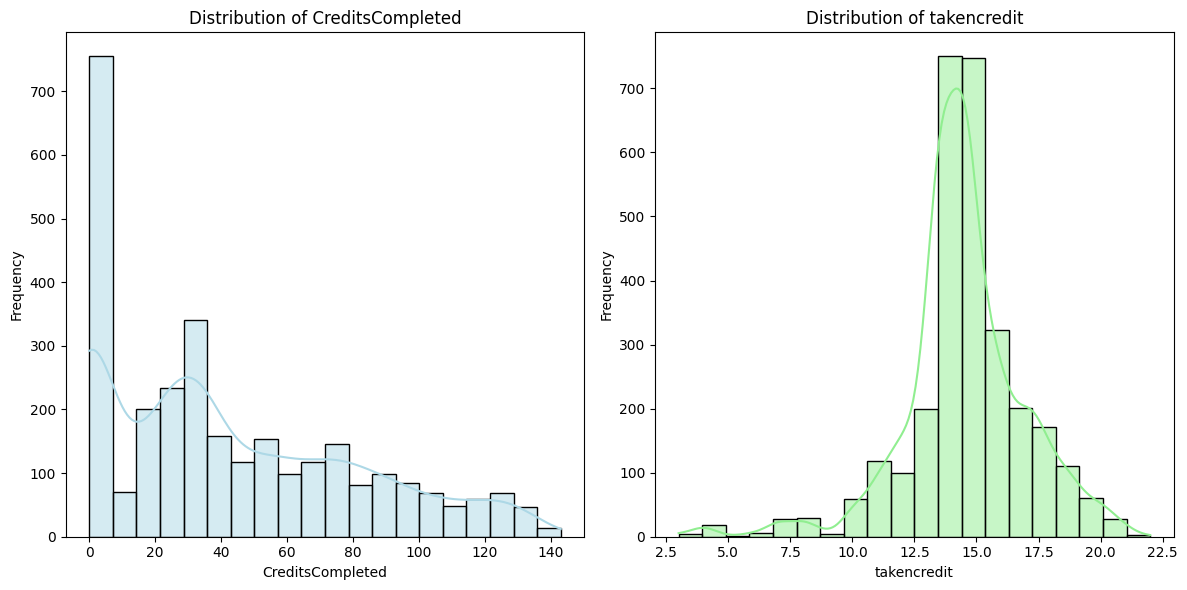

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Plotting CreditsCompleted and takencredit").getOrCreate()

df_spark = spark.read.csv(csv_file_path, header=True, inferSchema=True)

df = df_spark.toPandas()

plt.figure(figsize=(12, 6))

# Plot for CreditsCompleted
plt.subplot(1, 2, 1)
sns.histplot(df['CreditsCompleted'], bins=20, kde=True, color='lightblue', edgecolor='black')
plt.title('Distribution of CreditsCompleted')
plt.xlabel('CreditsCompleted')
plt.ylabel('Frequency')

# Plot for takencredit
plt.subplot(1, 2, 2)
sns.histplot(df['takencredit'], bins=20, kde=True, color='lightgreen', edgecolor='black')
plt.title('Distribution of takencredit')
plt.xlabel('takencredit')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# 7. Course Co-occurrence:
Create a network graph to display courses that are frequently taken together.

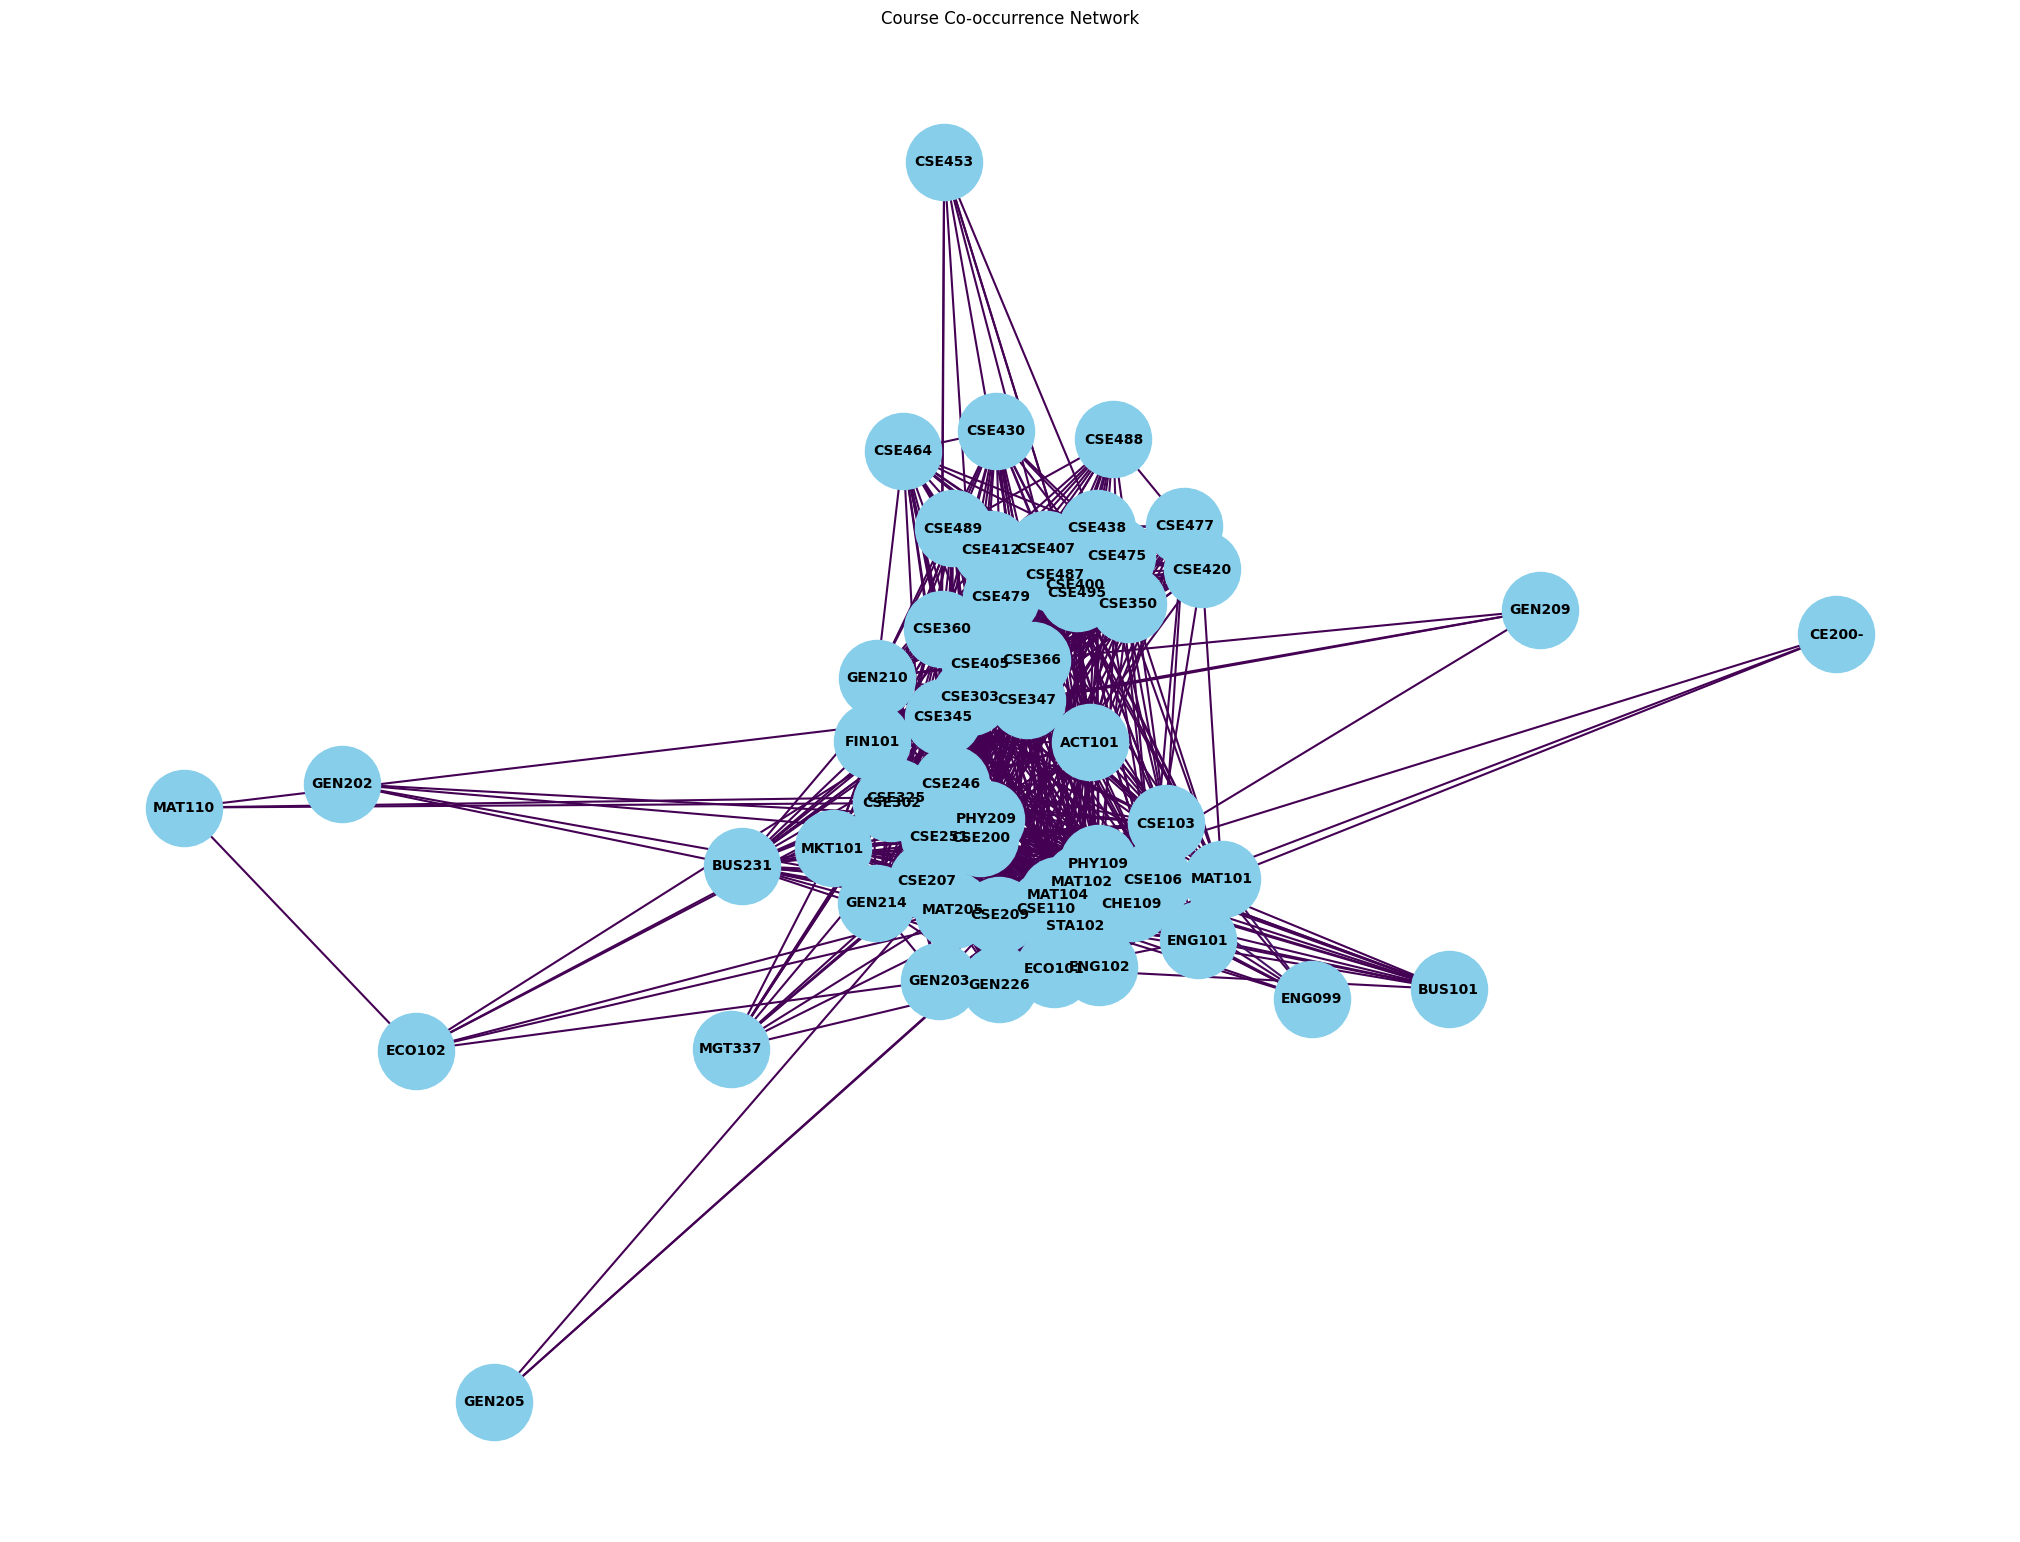

In [109]:
# Import necessary libraries
import pandas as pd
from itertools import combinations
import networkx as nx  # This imports the networkx library
import matplotlib.pyplot as plt
from collections import Counter
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("Course Co-occurrence").getOrCreate()

# Read the dataset
csv_file_path = '/content/Course_Advising_shuffled_file.csv'  # Replace with your file path
df_spark = spark.read.csv(csv_file_path, header=True, inferSchema=True)

# Convert to pandas dataframe
df = df_spark.toPandas()
columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']

# Generate all possible pairs of courses from each row
course_pairs = []
for index, row in df.iterrows():
    courses = [row[col] for col in columns if pd.notnull(row[col])]  # Ignore NaN values
    pairs = combinations(courses, 2)
    course_pairs.extend(pairs)

# Count the occurrences of each pair
pair_counts = Counter(course_pairs)

# Create the network graph
G = nx.Graph()

# Add edges based on pair counts
for pair, count in pair_counts.items():
    G.add_edge(pair[0], pair[1], weight=count)

# Draw the network graph
plt.figure(figsize=(20, 15))
pos = nx.spring_layout(G, k=0.15, iterations=20)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', width=1.5, edge_color=[G[u][v]['weight'] for u, v in G.edges()])
plt.title('Course Co-occurrence Network')
plt.show()


**For top 30 most common pairs.**

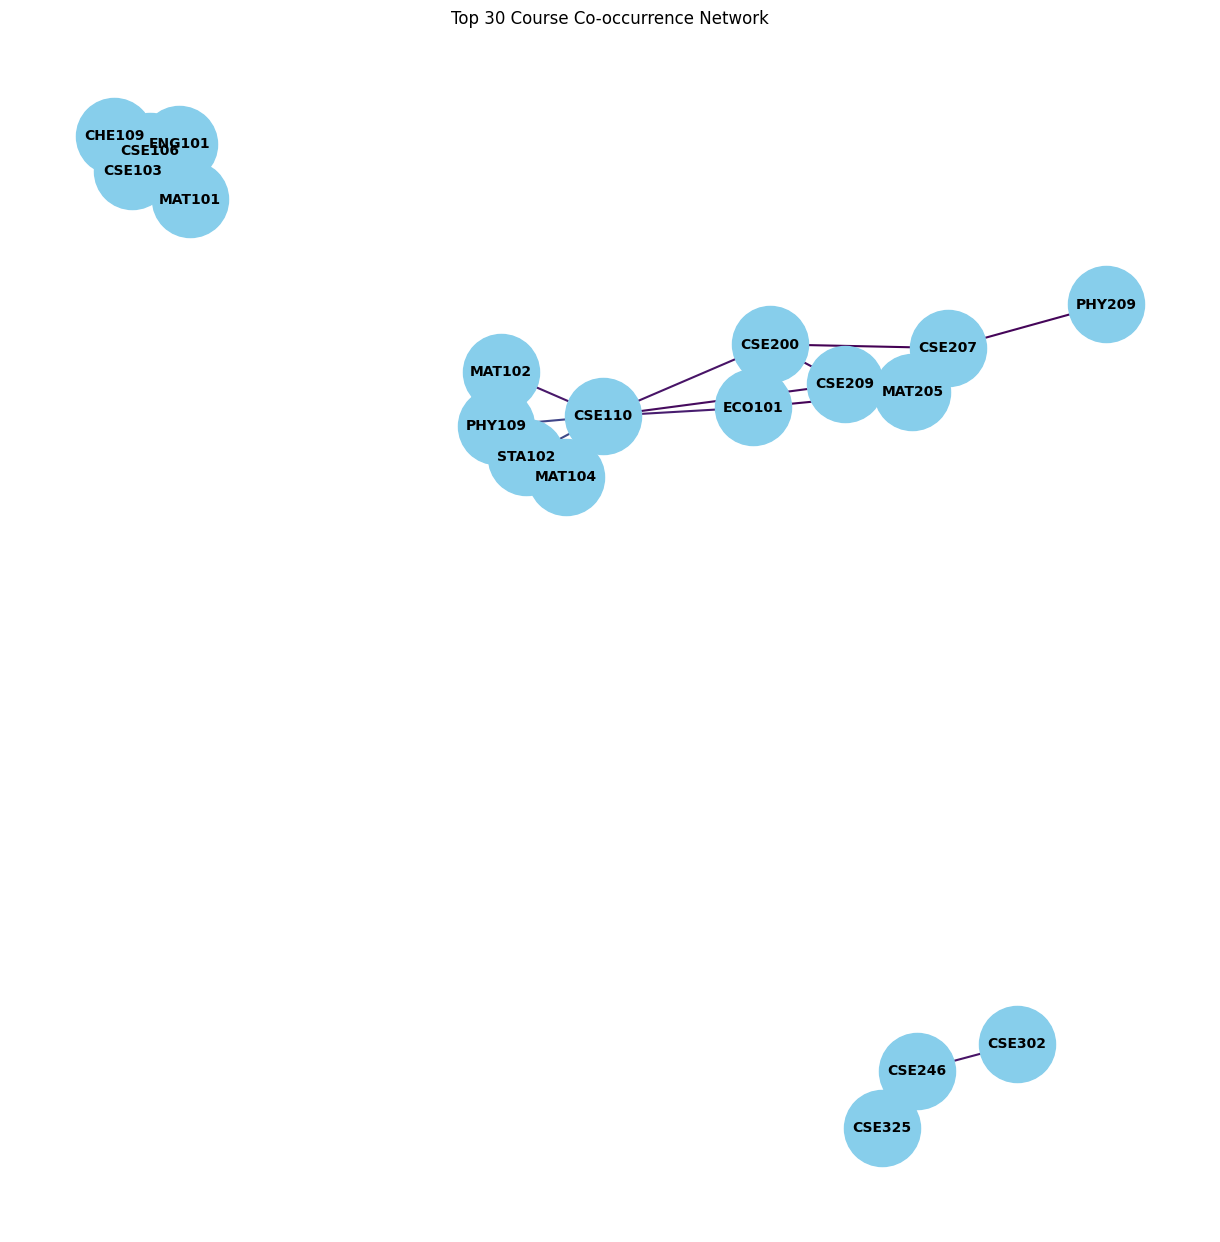

In [110]:
# Import necessary libraries
import pandas as pd
from itertools import combinations
import networkx as nx  # This imports the networkx library
import matplotlib.pyplot as plt
from collections import Counter
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("Course Co-occurrence").getOrCreate()

# Read the dataset
csv_file_path = '/content/Course_Advising_shuffled_file.csv'  # Replace with your file path
df_spark = spark.read.csv(csv_file_path, header=True, inferSchema=True)

# Convert to pandas dataframe
df = df_spark.toPandas()
columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']

# Generate all possible pairs of courses from each row
course_pairs = []
for index, row in df.iterrows():
    courses = [row[col] for col in columns if pd.notnull(row[col])]  # Ignore NaN values
    pairs = combinations(courses, 2)
    course_pairs.extend(pairs)

# Count the occurrences of each pair
pair_counts = Counter(course_pairs)

# Get the top 30 most common pairs
top_30_pairs = pair_counts.most_common(30)

# Create the network graph
G = nx.Graph()

# Add edges based on the top 30 pair counts
for pair, count in top_30_pairs:
    G.add_edge(pair[0], pair[1], weight=count)

# Draw the network graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=20)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', width=1.5, edge_color=[G[u][v]['weight'] for u, v in G.edges()])
plt.title('Top 30 Course Co-occurrence Network')
plt.show()


# 8. Association Rule Mining:

**Use algorithms like Apriori to generate association rules and find
confidence/support for course combinations (pairs, triples and so on).**

Let Treshold: 30

Treat each row as a "transaction" and each course as an "item."

In [ ]:
from itertools import combinations

# Step 1: Extract relevant columns (C1 to C7) as transactions
transactions_rdd = data_rdd.map(lambda line: [course.strip() for course in line.split(",")[4:10] if course.strip()])

# Function to generate candidate itemsets for a given size:
# (
#  transactions: A list of items (courses) in a single transaction (e.g., ['CSE101', 'ENG101', 'MAT101']).
#  frequent_items: A set of frequent itemsets from the previous iteration, e.g., frequent 1-itemsets or 2-itemsets.
# size: The size of the candidate itemsets to generate (e.g., 2 for pairs, 3 for triples).
# )
def generate_candidates(transactions, frequent_items, size):
    return [tuple(sorted(itemset)) for itemset in combinations(transactions, size)  #For transactions = ['CSE101', 'ENG101', 'MAT101'] and size = 2, the combinations function generates: [('CSE101', 'ENG101'), ('CSE101', 'MAT101'), ('ENG101', 'MAT101')]
            if all(tuple(sorted(subset)) in frequent_items for subset in combinations(itemset, size - 1))]  #Applies the Apriori pruning principle

# Function to count itemsets
def count_itemsets(transactions_rdd, candidates):
    candidate_set = set(candidates)
    return transactions_rdd.flatMap(lambda transaction: [itemset for itemset in candidate_set if set(itemset).issubset(transaction)]) \
                           .map(lambda itemset: (itemset, 1)).reduceByKey(lambda x, y: x + y)

# Step 2: Find 1-itemsets
item_counts = transactions_rdd.flatMap(lambda row: row).map(lambda item: (item, 1)).reduceByKey(lambda x, y: x + y)
frequent_1_itemsets = item_counts.filter(lambda x: x[1] > 30).map(lambda x: x[0]).collect()

# Store frequent itemsets
frequent_itemsets = {1: set([(item,) for item in frequent_1_itemsets])}
frequent_items = frequent_itemsets[1]  # Frequent 1-itemsets
size = 2

# Step 3: Generate k-itemsets (k >= 2)
while True:
    # Generate candidate itemsets of the current size
    candidates = transactions_rdd.flatMap(lambda transaction: generate_candidates(transaction, frequent_items, size)).distinct()

    # Count support for candidates
    candidate_counts = count_itemsets(transactions_rdd, candidates.collect())

    # Filter candidates that meet the threshold
    current_frequent_itemsets = candidate_counts.filter(lambda x: x[1] > 30).map(lambda x: x[0]).collect()

    if not current_frequent_itemsets:
        break

    # Update frequent itemsets and candidates for the next iteration
    frequent_itemsets[size] = set(current_frequent_itemsets)
    frequent_items = frequent_itemsets[size]
    size += 1

# Display frequent itemsets
print("Frequent Itemsets:")
for size, itemsets in frequent_itemsets.items():
    print(f"{size}-itemsets: {itemsets}")


Frequent Itemsets:
1-itemsets: {('CSE345',), ('PHY109',), ('ENG099',), ('MKT101',), ('CSE103',), ('GEN226',), ('CSE251',), ('GEN203',), ('CSE489',), ('CSE405',), ('CSE487',), ('CSE430',), ('GEN210',), ('CSE303',), ('ENG101',), ('CSE209',), ('STA102',), ('CSE207',), ('CSE438',), ('ECO101',), ('CSE477',), ('MAT205',), ('CSE347',), ('MAT102',), ('ACT101',), ('FIN101',), ('CSE407',), ('CSE479',), ('CSE475',), ('MAT101',), ('ENG102',), ('CSE495',), ('CSE366',), ('CSE325',), ('CSE464',), ('PHY209',), ('CSE200',), ('GEN214',), ('CSE302',), ('MAT104',), ('CSE110',), ('CSE246',), ('CSE400',), ('CSE106',), ('CSE360',), ('CSE420',), ('CSE488',), ('CSE412',), ('CHE109',), ('CSE350',)}
2-itemsets: {('CSE200', 'GEN226'), ('CSE200', 'PHY109'), ('CSE366', 'CSE487'), ('CSE325', 'MAT205'), ('CSE209', 'ECO101'), ('MAT102', 'PHY109'), ('CHE109', 'ENG102'), ('CSE407', 'CSE487'), ('CSE207', 'CSE209'), ('CSE345', 'CSE360'), ('MAT205', 'STA102'), ('CSE106', 'ENG102'), ('CSE207', 'STA102'), ('CSE302', 'CSE303'

For Support **Threshold(30)**: We can not get **5-itemset.**

    Summary of Process:
1.   Extract transactions from the dataset.
2.   Find frequent 1-itemsets using support threshold.
3. Iteratively generate candidate k-itemsets and apply the Apriori pruning principle.
4. Count support for candidate itemsets and filter those meeting the threshold.
5. Stop when no more frequent itemsets can be generated.
6. Display frequent itemsets of all sizes.

> ***Association rule:*** 🔗🔗🔗👨‍💻

finding  confidence/support for course combinations (pairs, triples and so on).



In [ ]:
# Step 1: Total number of transactions
num_transactions = transactions_rdd.count()

# Step 2: Support calculation
support_dict = {}  # Dictionary to store support values for each itemset

for size, itemsets in frequent_itemsets.items():
    for itemset in itemsets:
        # Count occurrences of the itemset
        count = transactions_rdd.filter(lambda transaction: set(itemset).issubset(set(transaction))).count()

        # Calculate support
        support = count / num_transactions
        support_dict[itemset] = support

# Step 3: Confidence calculation for rules
confidence_dict = {}  # Dictionary to store confidence values for rules

for size, itemsets in frequent_itemsets.items():
    if size < 2:  # Skip 1-itemsets (no rules can be generated)
        continue

    for itemset in itemsets:
        # Generate all possible subsets of the itemset
        subsets = [set(subset) for subset in combinations(itemset, size - 1)]

        for subset in subsets:
            antecedent = tuple(sorted(subset))
            consequent = tuple(sorted(set(itemset) - subset))

            # Calculate confidence for rule: antecedent -> consequent
            if antecedent in support_dict and itemset in support_dict:
                confidence = support_dict[itemset] / support_dict[antecedent]
                confidence_dict[(antecedent, consequent)] = confidence

# Step 4: Display results
print("Support for Itemsets:")
for itemset, support in support_dict.items():
    print(f"{itemset}: {support:.2f}")

print("\nConfidence for Rules:")
for rule, confidence in confidence_dict.items():
    antecedent, consequent = rule
    print(f"{antecedent} -> {consequent}: {confidence:.2f}")


Support for Itemsets:
('CSE345',): 0.09
('PHY109',): 0.14
('ENG099',): 0.01
('MKT101',): 0.02
('CSE103',): 0.27
('GEN226',): 0.09
('CSE251',): 0.08
('GEN203',): 0.03
('CSE489',): 0.02
('CSE405',): 0.06
('CSE487',): 0.05
('CSE430',): 0.01
('GEN210',): 0.02
('CSE303',): 0.08
('ENG101',): 0.24
('CSE209',): 0.14
('STA102',): 0.15
('CSE207',): 0.13
('CSE438',): 0.03
('ECO101',): 0.12
('CSE477',): 0.02
('MAT205',): 0.12
('CSE347',): 0.07
('MAT102',): 0.09
('ACT101',): 0.01
('FIN101',): 0.04
('CSE407',): 0.04
('CSE479',): 0.03
('CSE475',): 0.03
('MAT101',): 0.18
('ENG102',): 0.07
('CSE495',): 0.04
('CSE366',): 0.07
('CSE325',): 0.09
('CSE464',): 0.01
('PHY209',): 0.12
('CSE200',): 0.13
('GEN214',): 0.03
('CSE302',): 0.09
('MAT104',): 0.13
('CSE110',): 0.18
('CSE246',): 0.12
('CSE400',): 0.07
('CSE106',): 0.31
('CSE360',): 0.07
('CSE420',): 0.01
('CSE488',): 0.01
('CSE412',): 0.03
('CHE109',): 0.14
('CSE350',): 0.02
('CSE200', 'GEN226'): 0.02
('CSE200', 'PHY109'): 0.02
('CSE366', 'CSE487'): 0.

# 9. **Clustering:**

Data Preprocessing

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Course_Advising_shuffled_file.csv'  # Replace with your dataset file path
df = pd.read_csv(file_path)

# Step 1: Extract all unique courses from columns C1 to C7
course_columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
unique_courses = pd.unique(df[course_columns].values.ravel('K')).tolist()

# Remove any NaN values if present in the list
unique_courses = [course for course in unique_courses if pd.notna(course)]

# Step 2: Initialize a new DataFrame with one column for each course
for course in unique_courses:
    df[course] = 0  # Add a new column for each unique course with default value 0

# Step 3: Fill the course columns with 1 where a student has taken the course
for course_col in course_columns:
    for course in unique_courses:
        df[course] = df[course] | (df[course_col] == course).astype(int)

# Step 4: Drop the original course columns (C1 to C7)
df_transformed = df.drop(columns=course_columns)

# Save the transformed dataset to a new CSV file
df_transformed.to_csv('transformed_student_data.csv', index=False)

# Display the first few rows of the transformed DataFrame
df_transformed

,StudentId,CreditsCompleted,takencredit,takennocourse,CSE110,CSE207,CSE303,CHE109,CSE347,CSE246,...,GEN214,ENG099,PHY209,CSE453,MKT101,MGT337,GEN202,GEN205,GEN209,MAT110
0,1,29.5,14.5,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,41.0,14.0,4,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,17.5,17.5,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,44.5,13.5,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,82.0,4.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,2956,90.0,15.0,4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2956,2957,60.0,15.0,4,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2957,2958,116.0,12.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2958,2959,0.0,14.5,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_transformed=df_transformed.drop(columns=['StudentId'])
# df_transformed= df_transformed.T
df_transformed

,CreditsCompleted,takencredit,takennocourse,CSE110,CSE207,CSE303,CHE109,CSE347,CSE246,CSE103,...,GEN214,ENG099,PHY209,CSE453,MKT101,MGT337,GEN202,GEN205,GEN209,MAT110
0,29.5,14.5,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41.0,14.0,4,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,17.5,17.5,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44.5,13.5,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,82.0,4.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,90.0,15.0,4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2956,60.0,15.0,4,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2957,116.0,12.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2958,0.0,14.5,4,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


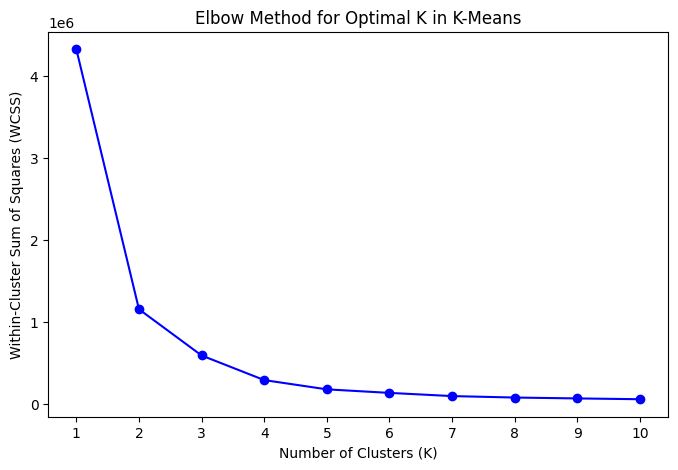

In [ ]:
# Calculate WCSS for a range of K values to use the Elbow Method
wcss = []
k_range = range(1, 11)  # Range of K values from 1 to 10

# Iterate through each k and calculate WCSS
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_transformed)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal K in K-Means")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.xticks(k_range)
plt.show()

**Run cluster over course:**

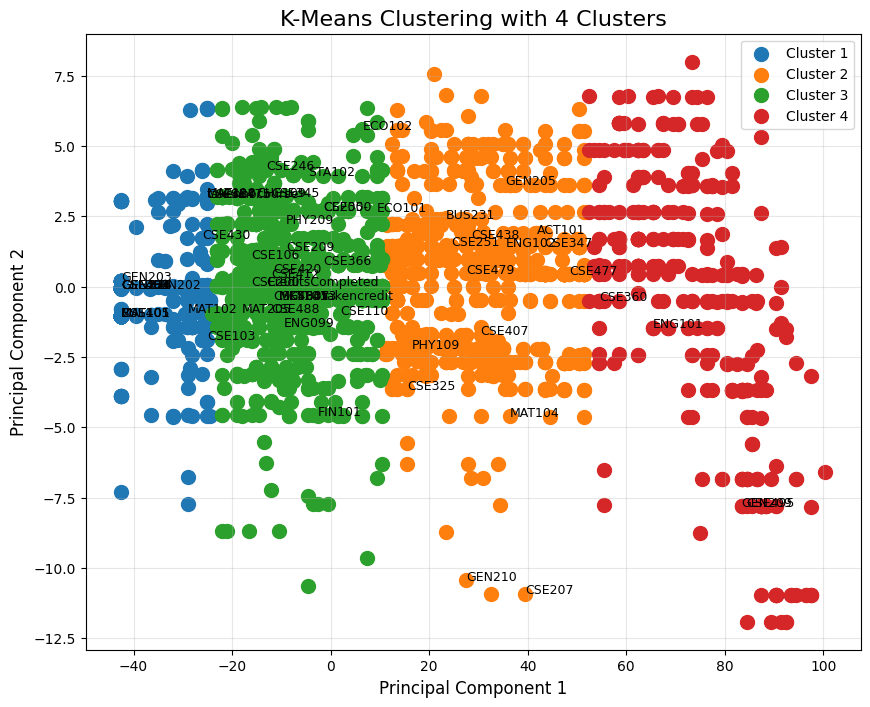

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df_transformed' is a numpy array or list of vectors
# Step 1: Convert df_transformed to a numpy array (if not already)
df_transformed_array = np.array(df_transformed)

# Step 2: Set the number of clusters (e.g., based on the Elbow Method)
optimal_clusters = 4

# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(df_transformed_array)

# Step 4: Get cluster labels for each embedding
cluster_labels = kmeans.labels_

# Step 5: Visualize Clusters in 2D using PCA
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
df_transformed_2d = pca.fit_transform(df_transformed_array)

# Plot the clustered data
plt.figure(figsize=(10, 8))
for cluster in range(optimal_clusters):
    cluster_points = df_transformed_2d[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster + 1}", s=100)

# Annotate points with entity names
for i, entity in enumerate(df_transformed):
    plt.text(df_transformed_2d[i, 0], df_transformed_2d[i, 1], entity.split("/")[-1], fontsize=9)

# Add labels and title
plt.title(f"K-Means Clustering with {optimal_clusters} Clusters", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# Dictionary to store df_transformed for each cluster
cluster_df_transformed = {f"Cluster_{i+1}": [] for i in range(optimal_clusters)}

# Distribute df_transformed into their respective clusters
for entity, label in zip(df_transformed, kmeans.labels_):
    cluster_df_transformed[f"Cluster_{label+1}"].append(entity)

# Display the number of df_transformed in each cluster
for cluster, df_transformed_list in cluster_df_transformed.items():
    print(f"Number of df_transformed in {cluster}: {len(df_transformed_list)}")

# Save df_transformed for each cluster in text files
for cluster, df_transformed_list in cluster_df_transformed.items():
    file_name = f"{cluster.lower()}_df_transformed.txt"
    with open(file_name, "w") as file:
        file.write("\n".join(df_transformed_list))

# Print all cluster df_transformed
for cluster, df_transformed_list in cluster_df_transformed.items():
    print(f"\n{cluster} df_transformed:")
    print(df_transformed_list)


Number of df_transformed in Cluster_1: 17
Number of df_transformed in Cluster_2: 15
Number of df_transformed in Cluster_3: 27
Number of df_transformed in Cluster_4: 4

Cluster_1 df_transformed:
['takennocourse', 'CSE303', 'CSE103', 'CSE302', 'CSE405', 'CSE487', 'GEN226', 'CSE464', 'CSE430', 'MAT101', 'MAT102', 'BUS101', 'GEN203', 'CSE489', 'GEN214', 'GEN202', 'MAT110']

Cluster_2 df_transformed:
['CSE207', 'CSE347', 'CSE251', 'CSE325', 'MAT104', 'ACT101', 'BUS231', 'CSE477', 'ENG102', 'CSE438', 'CSE479', 'PHY109', 'CSE407', 'GEN210', 'GEN205']

Cluster_3 df_transformed:
['CreditsCompleted', 'takencredit', 'CSE110', 'CHE109', 'CSE246', 'CSE209', 'CSE200', 'CSE106', 'CSE366', 'CSE412', 'CSE400', 'CSE350', 'CSE475', 'CSE345', 'ECO101', 'CSE420', 'CSE488', 'CE200-', 'MAT205', 'FIN101', 'STA102', 'ECO102', 'ENG099', 'PHY209', 'CSE453', 'MKT101', 'MGT337']

Cluster_4 df_transformed:
['CSE360', 'CSE495', 'ENG101', 'GEN209']


**Run cluster over Students:**

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Course_Advising_shuffled_file.csv'  # Replace with your dataset file path
df = pd.read_csv(file_path)

# Step 1: Extract all unique courses from columns C1 to C7
course_columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
unique_courses = pd.unique(df[course_columns].values.ravel('K')).tolist()

# Remove any NaN values if present in the list
unique_courses = [course for course in unique_courses if pd.notna(course)]

# Step 2: Initialize a new DataFrame with one column for each course
for course in unique_courses:
    df[course] = 0  # Add a new column for each unique course with default value 0

# Step 3: Fill the course columns with 1 where a student has taken the course
for course_col in course_columns:
    for course in unique_courses:
        df[course] = df[course] | (df[course_col] == course).astype(int)

# Step 4: Drop the original course columns (C1 to C7)
df_transformed = df.drop(columns=course_columns)

# Save the transformed dataset to a new CSV file
df_transformed.to_csv('transformed_student_data.csv', index=False)

# Display the first few rows of the transformed DataFrame
df_transformed

,StudentId,CreditsCompleted,takencredit,takennocourse,CSE110,CSE207,CSE303,CHE109,CSE347,CSE246,...,GEN214,ENG099,PHY209,CSE453,MKT101,MGT337,GEN202,GEN205,GEN209,MAT110
0,1,29.5,14.5,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,41.0,14.0,4,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,17.5,17.5,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,44.5,13.5,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,82.0,4.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,2956,90.0,15.0,4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2956,2957,60.0,15.0,4,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2957,2958,116.0,12.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2958,2959,0.0,14.5,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_transformed=df_transformed.drop(columns=['StudentId'])
df_transformed= df_transformed.T
df_transformed
# Save the transformed dataset to a new CSV file
df_transformed.to_csv('T.csv', index=False)


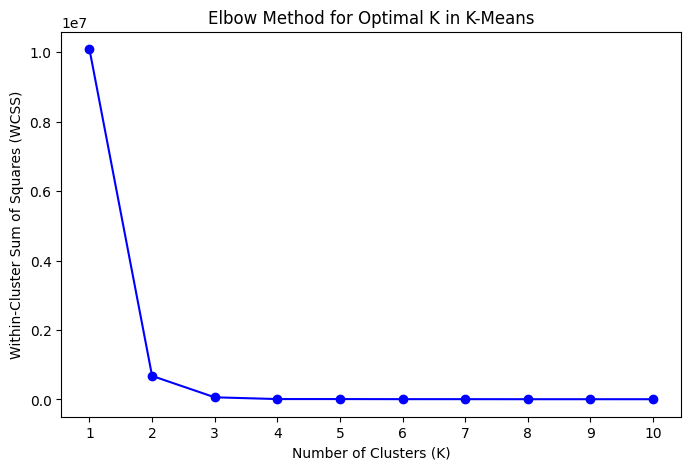

In [ ]:
# Calculate WCSS for a range of K values to use the Elbow Method
wcss = []
k_range = range(1, 11)  # Range of K values from 1 to 10

# Iterate through each k and calculate WCSS
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_transformed)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal K in K-Means")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.xticks(k_range)
plt.show()

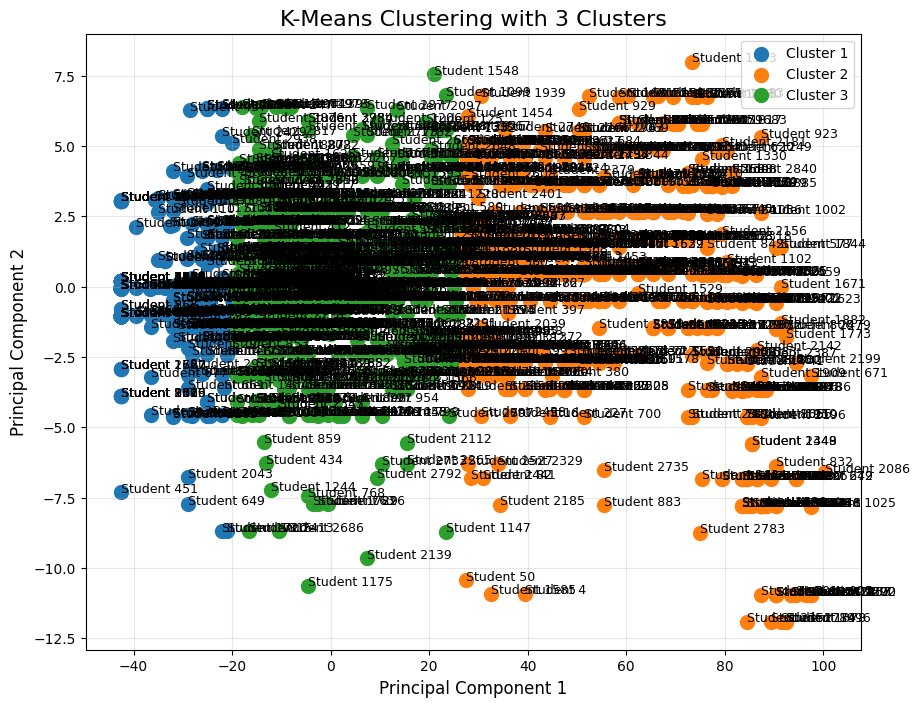

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Assuming df_transformed is already processed
# Transpose the dataframe (switch rows and columns)
df_transformed = df_transformed.T

# Step 1: Convert the transposed df_transformed to a numpy array
df_transformed_array = np.array(df_transformed)

# Step 2: Set the number of clusters (e.g., based on the Elbow Method)
optimal_clusters = 3

# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(df_transformed_array)

# Step 4: Get cluster labels for each student
cluster_labels = kmeans.labels_

# Step 5: Reduce dimensions to 2 for visualization using PCA
pca = PCA(n_components=2)
df_transformed_2d = pca.fit_transform(df_transformed_array)

# Step 6: Plot the clustered data
plt.figure(figsize=(10, 8))
for cluster in range(optimal_clusters):
    cluster_points = df_transformed_2d[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster + 1}", s=100)

# Optional: Annotate points with student IDs or course names
# Assuming the index of df_transformed represents student IDs or any other labels

for i, student_id in enumerate(df_transformed.index):
    plt.text(df_transformed_2d[i, 0], df_transformed_2d[i, 1], f"Student {student_id}", fontsize=9)

# Add labels and title to the plot
plt.title(f"K-Means Clustering with {optimal_clusters} Clusters", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# 10. Recommendation System:
Design a simple recommender system for students to suggest courses based on
previously taken courses.

**Using recommendation system algorithm:**

Search by ID

In [5]:
import pandas as pd
from pprint import pprint  # Ensure this is included

# Load the CSV file into a pandas DataFrame
csv_file_path = '/content/Course_Advising_shuffled_file.csv'  # Replace with the actual file path
df = pd.read_csv(csv_file_path)
df = df.drop(columns=['CreditsCompleted', 'takencredit','takennocourse'], axis=1)
df


,StudentId,C1,C2,C3,C4,C5,C6,C7
0,1,CSE110,ECO101,MAT205,PHY109,NaN,NaN,NaN
1,2,CSE207,CSE209,MAT205,PHY209,NaN,NaN,NaN
2,3,CSE110,ENG102,MAT102,MAT104,PHY109,NaN,NaN
3,4,CSE110,GEN203,MAT101,MAT205,NaN,NaN,NaN
4,5,CSE303,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2955,2956,CSE405,CSE412,CSE303,CSE360,NaN,NaN,NaN
2956,2957,CSE246,CSE302,GEN203,PHY209,NaN,NaN,NaN
2957,2958,CSE487,CSE495,CSE488,CSE400,NaN,NaN,NaN
2958,2959,CHE109,CSE103,CSE106,ENG101,NaN,NaN,NaN


In [9]:
# Convert the DataFrame to a dictionary
data_dict = df.to_dict(orient='list')

print("{")
for key, value in data_dict.items():
    print(f'    "{key}": {value},')
print("}")

{
    "StudentId": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218

In [11]:
df = pd.DataFrame(data_dict)

# Combine all courses taken by each student into a single string
df['Courses'] = df[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']].apply(
    lambda x: ' '.join(x.dropna()), axis=1
)
df

,StudentId,C1,C2,C3,C4,C5,C6,C7,Courses
0,1,CSE110,ECO101,MAT205,PHY109,NaN,NaN,NaN,CSE110 ECO101 MAT205 PHY109
1,2,CSE207,CSE209,MAT205,PHY209,NaN,NaN,NaN,CSE207 CSE209 MAT205 PHY209
2,3,CSE110,ENG102,MAT102,MAT104,PHY109,NaN,NaN,CSE110 ENG102 MAT102 MAT104 PHY109
3,4,CSE110,GEN203,MAT101,MAT205,NaN,NaN,NaN,CSE110 GEN203 MAT101 MAT205
4,5,CSE303,NaN,NaN,NaN,NaN,NaN,NaN,CSE303
...,...,...,...,...,...,...,...,...,...
2955,2956,CSE405,CSE412,CSE303,CSE360,NaN,NaN,NaN,CSE405 CSE412 CSE303 CSE360
2956,2957,CSE246,CSE302,GEN203,PHY209,NaN,NaN,NaN,CSE246 CSE302 GEN203 PHY209
2957,2958,CSE487,CSE495,CSE488,CSE400,NaN,NaN,NaN,CSE487 CSE495 CSE488 CSE400
2958,2959,CHE109,CSE103,CSE106,ENG101,NaN,NaN,NaN,CHE109 CSE103 CSE106 ENG101


In [22]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the course data
vectorizer = CountVectorizer()
course_matrix = vectorizer.fit_transform(df['Courses'])

# Compute cosine similarity between students
similarity_matrix = cosine_similarity(course_matrix)

# Function to recommend courses
def recommend_courses(student_id, df, similarity_matrix, top_n=3):
    student_index = df[df['StudentId'] == student_id].index[0]
    similar_students = list(enumerate(similarity_matrix[student_index]))
    similar_students = sorted(similar_students, key=lambda x: x[1], reverse=True)

    # Gather all courses taken by similar students
    recommended_courses = set()
    student_courses = set(df.loc[student_index, 'Courses'].split())

    for student, score in similar_students[1:]:  # Skip self
        if score > 0:  # Only consider similar students
            courses = set(df.loc[student, 'Courses'].split())
            recommended_courses.update(courses - student_courses)  # Exclude already taken courses
        if len(recommended_courses) >= top_n:
            break

    return list(recommended_courses)[:top_n]

# Example: Recommend courses for StudentId 1
student_id =334
recommended_courses = recommend_courses(student_id, df, similarity_matrix)
print(f"Recommended courses for StudentId {student_id}: {recommended_courses}")

Recommended courses for StudentId 334: ['CSE475', 'CSE420', 'CSE366']


**Simple Searching by courses:**

In [25]:
import pandas as pd
from pprint import pprint  # Ensure this is included

# Load the CSV file into a pandas DataFrame
csv_file_path = '/content/Course_Advising_shuffled_file.csv'  # Replace with the actual file path
df = pd.read_csv(csv_file_path)
df = df.drop(columns=['CreditsCompleted', 'takencredit','takennocourse'], axis=1)

# Convert the DataFrame to a dictionary
data_dict = df.to_dict(orient='list')
df = pd.DataFrame(data_dict)
df


,StudentId,C1,C2,C3,C4,C5,C6,C7
0,1,CSE110,ECO101,MAT205,PHY109,NaN,NaN,NaN
1,2,CSE207,CSE209,MAT205,PHY209,NaN,NaN,NaN
2,3,CSE110,ENG102,MAT102,MAT104,PHY109,NaN,NaN
3,4,CSE110,GEN203,MAT101,MAT205,NaN,NaN,NaN
4,5,CSE303,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2955,2956,CSE405,CSE412,CSE303,CSE360,NaN,NaN,NaN
2956,2957,CSE246,CSE302,GEN203,PHY209,NaN,NaN,NaN
2957,2958,CSE487,CSE495,CSE488,CSE400,NaN,NaN,NaN
2958,2959,CHE109,CSE103,CSE106,ENG101,NaN,NaN,NaN


In [26]:
# Combine all courses for each student into a single list
df['AllCourses'] = df[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']].apply(
    lambda x: [course for course in x if pd.notna(course)], axis=1
)


In [27]:
df

,StudentId,C1,C2,C3,C4,C5,C6,C7,AllCourses
0,1,CSE110,ECO101,MAT205,PHY109,NaN,NaN,NaN,"[CSE110, ECO101, MAT205, PHY109]"
1,2,CSE207,CSE209,MAT205,PHY209,NaN,NaN,NaN,"[CSE207, CSE209, MAT205, PHY209]"
2,3,CSE110,ENG102,MAT102,MAT104,PHY109,NaN,NaN,"[CSE110, ENG102, MAT102, MAT104, PHY109]"
3,4,CSE110,GEN203,MAT101,MAT205,NaN,NaN,NaN,"[CSE110, GEN203, MAT101, MAT205]"
4,5,CSE303,NaN,NaN,NaN,NaN,NaN,NaN,[CSE303]
...,...,...,...,...,...,...,...,...,...
2955,2956,CSE405,CSE412,CSE303,CSE360,NaN,NaN,NaN,"[CSE405, CSE412, CSE303, CSE360]"
2956,2957,CSE246,CSE302,GEN203,PHY209,NaN,NaN,NaN,"[CSE246, CSE302, GEN203, PHY209]"
2957,2958,CSE487,CSE495,CSE488,CSE400,NaN,NaN,NaN,"[CSE487, CSE495, CSE488, CSE400]"
2958,2959,CHE109,CSE103,CSE106,ENG101,NaN,NaN,NaN,"[CHE109, CSE103, CSE106, ENG101]"


In [36]:
from collections import Counter

# Function to recommend courses
def recommend_courses_based_on_input(taken_courses, df, top_n=3):
    # Flatten the list of all courses except the input courses
    all_courses = [
        course
        for courses in df['AllCourses']
        if any(course in courses for course in taken_courses)  # Match students with similar courses
        for course in courses
    ]

    # Exclude the courses already taken
    filtered_courses = [course for course in all_courses if course not in taken_courses]

    # Count the frequency of each course
    course_counts = Counter(filtered_courses)

    # Recommend the top N courses
    recommended = [course for course, _ in course_counts.most_common(top_n)]
    return recommended

# Input: Previously taken courses
taken_courses = ["CSE110", 	"GEN203", 	"MAT101"	]

# Get recommendations
recommendations = recommend_courses_based_on_input(taken_courses, df)
print(f"Recommended courses for {taken_courses}: {recommendations}")

Recommended courses for ['CSE110', 'GEN203', 'MAT101']: ['CSE106', 'CSE103', 'ENG101']


# 11. Comparison:
Compare the course-taking behavior of students who have taken more than 50
credits vs. those who have taken fewer.


Top 20 popular courses among students with more than 50 credits:
CSE246    319
CSE345    257
CSE302    251
CSE325    241
CSE303    233
CSE400    212
CSE347    202
CSE360    199
CSE366    198
CSE251    182
CSE405    169
CSE487    149
PHY209    129
FIN101    121
CSE495    113
CSE407    104
CSE438    101
CSE412    100
CSE479     99
CSE475     94
Name: count, dtype: int64

Top 20 popular courses among students with 50 or fewer credits:
CSE106    898
CSE103    790
ENG101    707
CSE110    532
MAT101    527
STA102    430
CHE109    421
PHY109    412
CSE209    402
MAT104    363
ECO101    331
CSE207    329
CSE200    302
MAT205    292
MAT102    267
GEN226    235
PHY209    223
ENG102    206
GEN203     69
CSE251     44
Name: count, dtype: int64


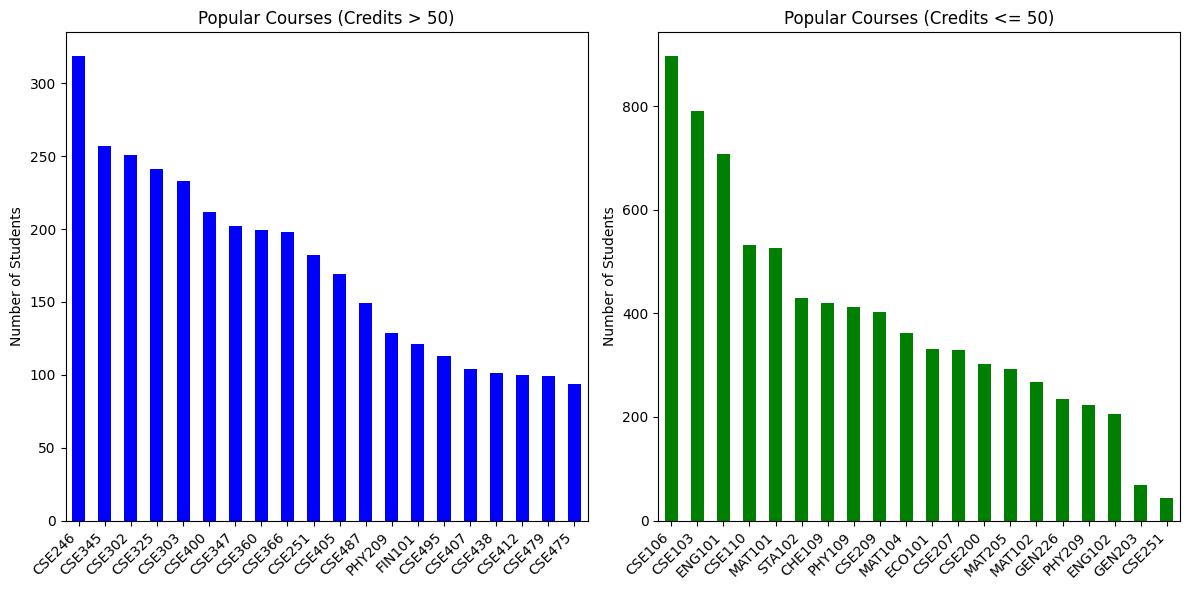

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
csv_file_path = '/content/Course_Advising_shuffled_file.csv'  # Replace with your file path
df = pd.read_csv(csv_file_path)

# Ensure 'CreditsCompleted' is numeric
df['CreditsCompleted'] = pd.to_numeric(df['CreditsCompleted'], errors='coerce')

# Combine all courses taken by each student into a single string
df['Courses'] = df[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']].apply(
    lambda x: ' '.join(x.dropna().astype(str)), axis=1
)

# Split data into two groups based on credits
more_than_50_credits = df[df['CreditsCompleted'] > 50]
fewer_than_50_credits = df[df['CreditsCompleted'] <= 50]

# Extract individual courses from the 'Courses' column for analysis
def split_and_count_courses(data):
    all_courses = ' '.join(data['Courses']).split()  # Split all courses into a list
    return pd.Series(all_courses).value_counts()  # Count occurrences of each course

popular_courses_more = split_and_count_courses(more_than_50_credits).head(20)
popular_courses_fewer = split_and_count_courses(fewer_than_50_credits).head(20)

print("\nTop 20 popular courses among students with more than 50 credits:")
print(popular_courses_more)

print("\nTop 20 popular courses among students with 50 or fewer credits:")
print(popular_courses_fewer)

# Visualization
plt.figure(figsize=(12, 6))

# Plot popular courses for students with more than 50 credits
plt.subplot(1, 2, 1)
popular_courses_more.plot(kind='bar', color='blue')
plt.title('Popular Courses (Credits > 50)')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')

# Plot popular courses for students with 50 or fewer credits
plt.subplot(1, 2, 2)
popular_courses_fewer.plot(kind='bar', color='green')
plt.title('Popular Courses (Credits <= 50)')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
csv_file_path = '/content/Course_Advising_shuffled_file.csv'  # Replace with your file path
df = pd.read_csv(csv_file_path)

# Define the mapping for credits to academic year
def map_credits_to_year(credits):
    if 1 <= credits <= 35:
        return '1st Year'
    elif 36 <= credits <= 70:
        return '2nd Year'
    elif 71 <= credits <= 105:
        return '3rd Year'
    elif 106 <= credits <= 140:
        return '4th Year'


# Create the 'Year' column
df['Year'] = df['CreditsCompleted'].apply(map_credits_to_year)
df


,StudentId,CreditsCompleted,takencredit,takennocourse,C1,C2,C3,C4,C5,C6,C7,Year
0,1,29.5,14.5,4,CSE110,ECO101,MAT205,PHY109,NaN,NaN,NaN,1st Year
1,2,41.0,14.0,4,CSE207,CSE209,MAT205,PHY209,NaN,NaN,NaN,2nd Year
2,3,17.5,17.5,5,CSE110,ENG102,MAT102,MAT104,PHY109,NaN,NaN,1st Year
3,4,44.5,13.5,4,CSE110,GEN203,MAT101,MAT205,NaN,NaN,NaN,2nd Year
4,5,82.0,4.0,1,CSE303,NaN,NaN,NaN,NaN,NaN,NaN,3rd Year
...,...,...,...,...,...,...,...,...,...,...,...,...
2955,2956,90.0,15.0,4,CSE405,CSE412,CSE303,CSE360,NaN,NaN,NaN,3rd Year
2956,2957,60.0,15.0,4,CSE246,CSE302,GEN203,PHY209,NaN,NaN,NaN,2nd Year
2957,2958,116.0,12.0,4,CSE487,CSE495,CSE488,CSE400,NaN,NaN,NaN,4th Year
2958,2959,0.0,14.5,4,CHE109,CSE103,CSE106,ENG101,NaN,NaN,NaN,None


In [55]:
# Combine all courses into a single column for easier analysis
df['Courses'] = df[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']].apply(
    lambda x: ' '.join(x.dropna().astype(str)), axis=1
)
df

,StudentId,CreditsCompleted,takencredit,takennocourse,C1,C2,C3,C4,C5,C6,C7,Year,Courses
0,1,29.5,14.5,4,CSE110,ECO101,MAT205,PHY109,NaN,NaN,NaN,1st Year,CSE110 ECO101 MAT205 PHY109
1,2,41.0,14.0,4,CSE207,CSE209,MAT205,PHY209,NaN,NaN,NaN,2nd Year,CSE207 CSE209 MAT205 PHY209
2,3,17.5,17.5,5,CSE110,ENG102,MAT102,MAT104,PHY109,NaN,NaN,1st Year,CSE110 ENG102 MAT102 MAT104 PHY109
3,4,44.5,13.5,4,CSE110,GEN203,MAT101,MAT205,NaN,NaN,NaN,2nd Year,CSE110 GEN203 MAT101 MAT205
4,5,82.0,4.0,1,CSE303,NaN,NaN,NaN,NaN,NaN,NaN,3rd Year,CSE303
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,2956,90.0,15.0,4,CSE405,CSE412,CSE303,CSE360,NaN,NaN,NaN,3rd Year,CSE405 CSE412 CSE303 CSE360
2956,2957,60.0,15.0,4,CSE246,CSE302,GEN203,PHY209,NaN,NaN,NaN,2nd Year,CSE246 CSE302 GEN203 PHY209
2957,2958,116.0,12.0,4,CSE487,CSE495,CSE488,CSE400,NaN,NaN,NaN,4th Year,CSE487 CSE495 CSE488 CSE400
2958,2959,0.0,14.5,4,CHE109,CSE103,CSE106,ENG101,NaN,NaN,NaN,None,CHE109 CSE103 CSE106 ENG101


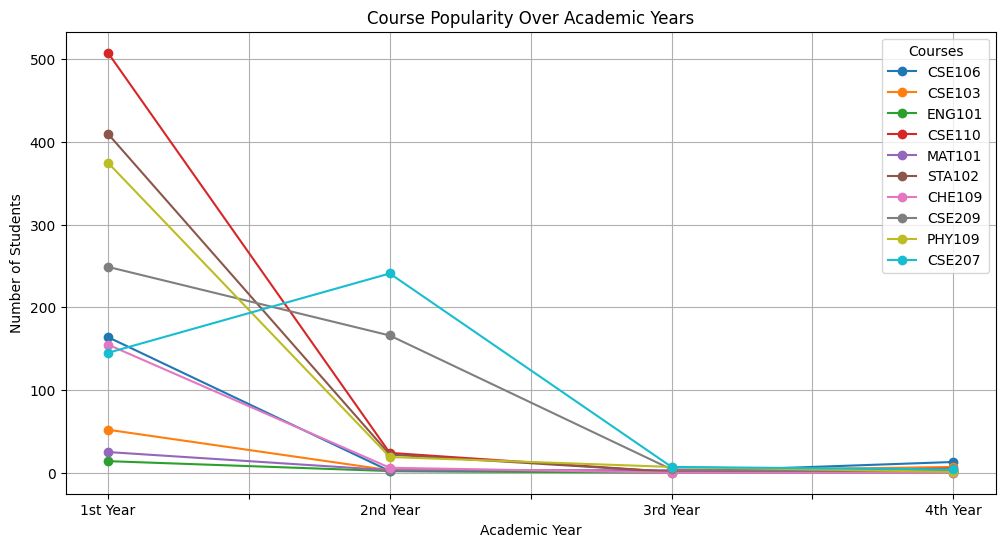

Courses   CSE106  CSE103  ENG101  CSE110  MAT101  STA102  CHE109  CSE209  \
Year                                                                       
1st Year   164.0    52.0    14.0   508.0    25.0   410.0   155.0   249.0   
2nd Year     2.0     3.0     2.0    24.0     3.0    22.0     6.0   166.0   
3rd Year     1.0     2.0     0.0     1.0     3.0     1.0     0.0     4.0   
4th Year    13.0     7.0     0.0     5.0     1.0     2.0     0.0     2.0   

Courses   PHY109  CSE207  
Year                      
1st Year   375.0   145.0  
2nd Year    19.0   241.0  
3rd Year     7.0     7.0  
4th Year     1.0     4.0  


In [62]:


# Explode the 'Courses' column so each course gets its own row
df_exploded = df.assign(Courses=df['Courses'].str.split()).explode('Courses')

# Group by 'Year' and 'Courses' to count enrollments
course_trends = df_exploded.groupby(['Year', 'Courses']).size().reset_index(name='Count')

# Pivot the data for visualization
course_trends_pivot = course_trends.pivot(index='Year', columns='Courses', values='Count').fillna(0)

# Plot trends for the top 10 most popular courses
top_courses = df_exploded['Courses'].value_counts().head(10).index  # Get the top 10 courses
course_trends_pivot[top_courses].plot(kind='line', figsize=(12, 6), marker='o')

plt.title('Course Popularity Over Academic Years')
plt.xlabel('Academic Year')
plt.ylabel('Number of Students')
plt.legend(title='Courses')
plt.grid()
plt.show()

# Optional: Print the trends table for inspection
print(course_trends_pivot[top_courses])

Input the course name to see:

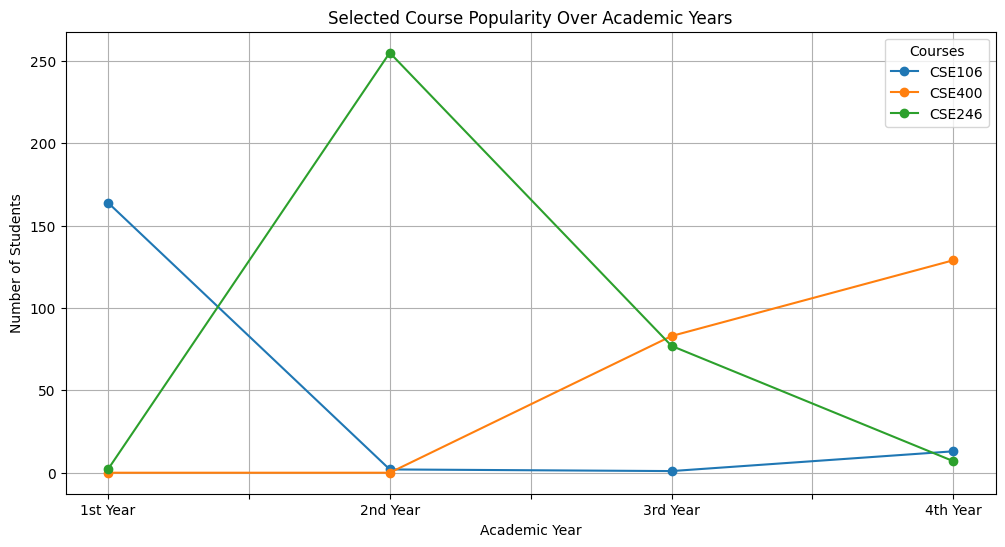

Courses   CSE106  CSE400  CSE246
Year                            
1st Year   164.0     0.0     2.0
2nd Year     2.0     0.0   255.0
3rd Year     1.0    83.0    77.0
4th Year    13.0   129.0     7.0


In [65]:
# Define the course names you want to visualize
selected_courses = ['CSE106','CSE400', 'CSE246']  # Replace with  course names

# Ensure the selected courses exist in the dataset
filtered_courses = [course for course in selected_courses if course in df_exploded['Courses'].unique()]

# Pivot and filter the data for the selected courses
course_trends_pivot_filtered = course_trends_pivot[filtered_courses]

# Plot trends for the specified courses
course_trends_pivot_filtered.plot(kind='line', figsize=(12, 6), marker='o')

plt.title('Selected Course Popularity Over Academic Years')
plt.xlabel('Academic Year')
plt.ylabel('Number of Students')
plt.legend(title='Courses')
plt.grid()
plt.show()

# Optional: Print the trends table for inspection
print(course_trends_pivot_filtered)


# 12. Student Profiles:

**Input the student ID to see the profile:**

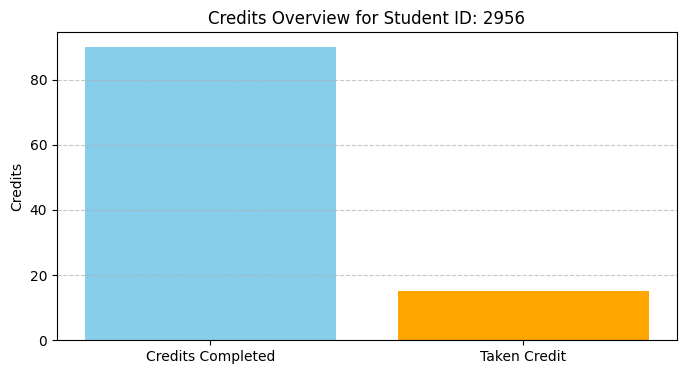

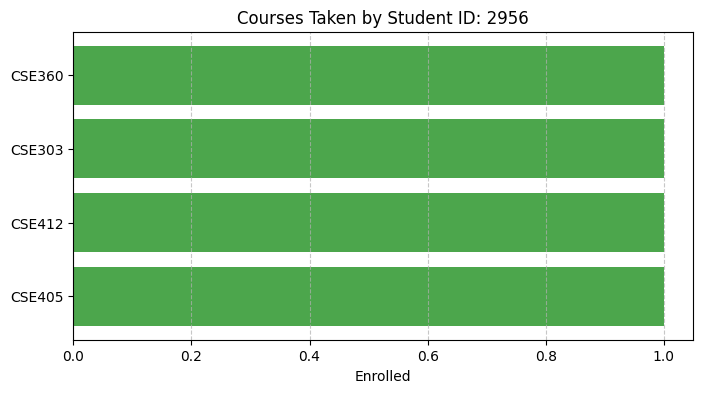

Academic Year: 3rd Year


In [72]:
import matplotlib.pyplot as plt

# Visualization function for a single student
def visualize_student_info(student_id):
    # Filter the DataFrame for the given StudentId
    student_info = df[df['StudentId'] == student_id]

    # Check if the student exists in the dataset
    if student_info.empty:
        print(f"No student found with ID: {student_id}")
        return

    # Extract relevant information
    student_row = student_info.iloc[0]  # Get the first (and only) row as a Series
    credits_completed = student_row['CreditsCompleted']
    taken_credit = student_row['takencredit']
    year = student_row['Year']
    courses = student_row[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']].dropna().tolist()

    # Plot 1: Credits (Completed vs Taken)
    plt.figure(figsize=(8, 4))
    plt.bar(['Credits Completed', 'Taken Credit'], [credits_completed, taken_credit], color=['skyblue', 'orange'])
    plt.title(f"Credits Overview for Student ID: {student_id}")
    plt.ylabel('Credits')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Plot 2: Courses Taken
    plt.figure(figsize=(8, 4))
    plt.barh(courses, [1] * len(courses), color='green', alpha=0.7)
    plt.title(f"Courses Taken by Student ID: {student_id}")
    plt.xlabel('Enrolled')
    plt.yticks(rotation=0)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

    # Print the Academic Year
    print(f"Academic Year: {year}")

# Example usage
student_id_to_visualize = 2956  # Replace with the StudentId you want to visualize
visualize_student_info(student_id_to_visualize)


# Some Visualization:

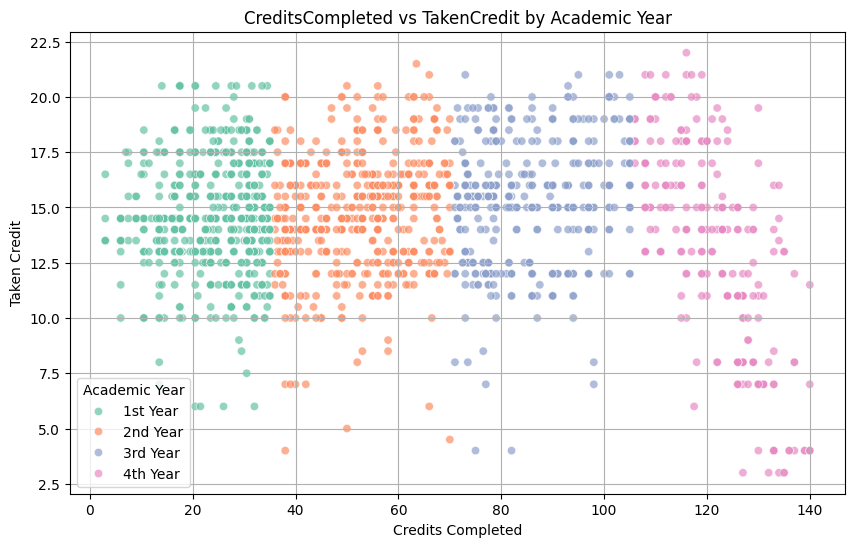

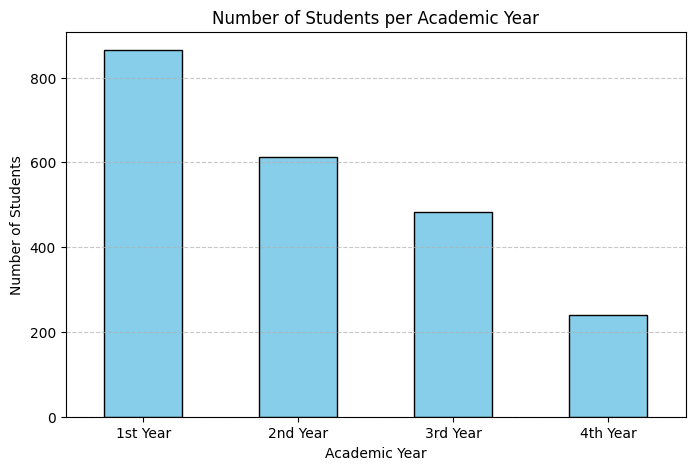

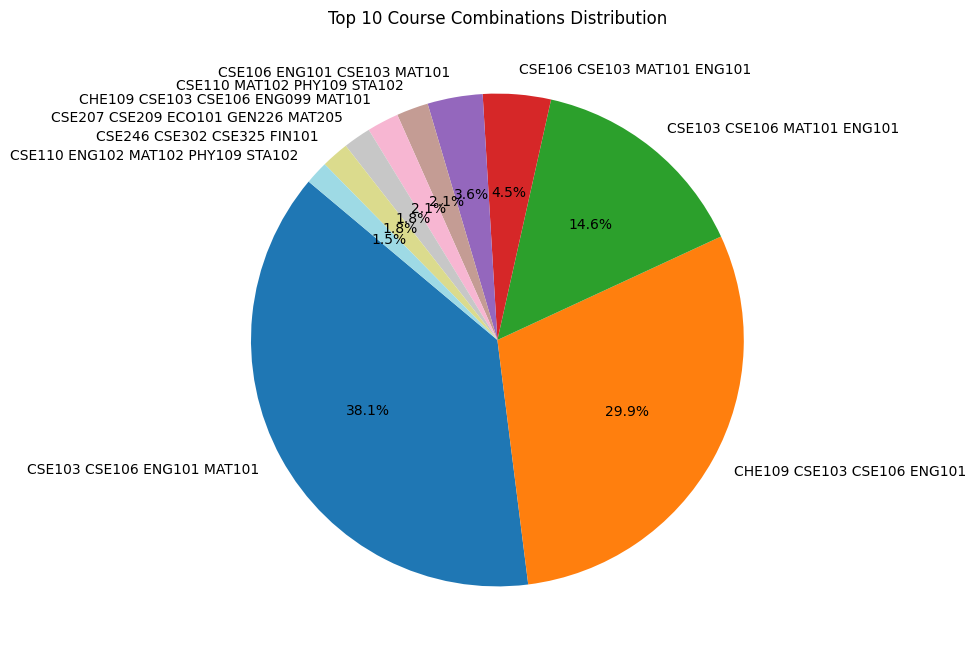

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
csv_file_path = '/content/Course_Advising_shuffled_file.csv'  # Replace with your file path
df = pd.read_csv(csv_file_path)

# Map CreditsCompleted to Academic Year
def map_credits_to_year(credits):
    if 1 <= credits <= 35:
        return '1st Year'
    elif 36 <= credits <= 70:
        return '2nd Year'
    elif 71 <= credits <= 105:
        return '3rd Year'
    elif 106 <= credits <= 140:
        return '4th Year'

df['Year'] = df['CreditsCompleted'].apply(map_credits_to_year)

# Combine courses into a single column
df['Courses'] = df[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']].apply(
    lambda x: ' '.join(x.dropna().astype(str)), axis=1
)

# 1. Scatter Plot: CreditsCompleted vs takencredit
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='CreditsCompleted', y='takencredit', hue='Year', palette='Set2', alpha=0.7
)
plt.title('CreditsCompleted vs TakenCredit by Academic Year')
plt.xlabel('Credits Completed')
plt.ylabel('Taken Credit')
plt.legend(title='Academic Year')
plt.grid()
plt.show()

# 2. Bar Chart: Count of Students in Each Year
year_counts = df['Year'].value_counts()
year_counts.plot(kind='bar', figsize=(8, 5), color='skyblue', edgecolor='black')
plt.title('Number of Students per Academic Year')
plt.xlabel('Academic Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Pie Chart: Distribution of Course Combinations
course_combinations = df['Courses'].value_counts().head(10)
course_combinations.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=140, colormap='tab20')
plt.title('Top 10 Course Combinations Distribution')
plt.ylabel('')  # Hide y-label
plt.show()

